In [8]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [48]:
import sys
import logging
import gym
import torch
torch.cuda.set_device('cuda:0')
from matplotlib import pyplot as plt

import cyberbattle.agents.baseline.learner as learner_m
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity, AgentWrapper, ActionTrackingStateAugmentation


logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

In [10]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [11]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10


In [12]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

AttackerGoal(reward=0.0, low_availability=1.0, own_atleast=0.0, own_atleast_percent=1.0)


In [13]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 509|reward: 6298.0|last_reward_at:  509|Elapsed Time: 0:00:03||


  Episode 1 ended at t=509 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/198 (0.10)
    explore-remote: 19/260 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 57
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8604, 


Episode 2|Iteration 527|reward: 6288.0|last_reward_at:  527|Elapsed Time: 0:00:03||


  Episode 2 ended at t=527 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/195 (0.09)
    explore-remote: 19/283 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 77
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8213, 


Episode 3|Iteration 721|reward: 6294.0|last_reward_at:  721|Elapsed Time: 0:00:04||


  Episode 3 ended at t=721 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/286 (0.06)
    explore-remote: 20/385 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 122
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7712, 


Episode 4|Iteration 740|reward: 6296.0|last_reward_at:  740|Elapsed Time: 0:00:05||


  Episode 4 ended at t=740 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/306 (0.06)
    explore-remote: 20/383 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 188
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7233, 


Episode 5|Iteration 578|reward: 6292.0|last_reward_at:  578|Elapsed Time: 0:00:04||


  Episode 5 ended at t=578 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/248 (0.07)
    explore-remote: 20/280 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 165
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6883, 


Episode 6|Iteration 587|reward: 6298.0|last_reward_at:  587|Elapsed Time: 0:00:03||


  Episode 6 ended at t=587 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/220 (0.09)
    explore-remote: 20/315 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 195
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6547, 


Episode 7|Iteration 720|reward: 6296.0|last_reward_at:  720|Elapsed Time: 0:00:05||


  Episode 7 ended at t=720 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/303 (0.06)
    explore-remote: 20/365 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 228
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6162, 


Episode 8|Iteration 444|reward: 6292.0|last_reward_at:  444|Elapsed Time: 0:00:02||


  Episode 8 ended at t=444 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/171 (0.10)
    explore-remote: 20/223 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 170
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5938, 


Episode 9|Iteration 430|reward: 6288.0|last_reward_at:  430|Elapsed Time: 0:00:02||


  Episode 9 ended at t=430 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/156 (0.11)
    explore-remote: 19/225 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 179
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5730, 


Episode 10|Iteration 527|reward: 6300.0|last_reward_at:  527|Elapsed Time: 0:00:03||


  Episode 10 ended at t=527 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/188 (0.10)
    explore-remote: 20/288 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 219
simulation ended


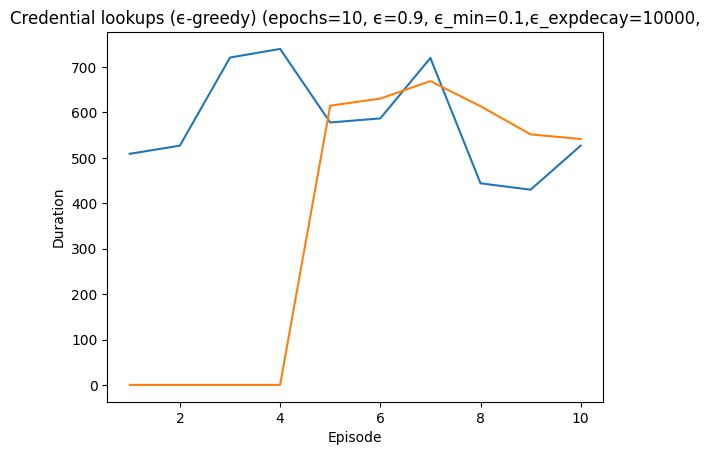

In [14]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [15]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 1057|reward: 6286.0|last_reward_at: 1057|Elapsed Time: 0:00:10||


  Episode 1 ended at t=1057 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/223 (0.07)
    explore-remote: 19/315 (0.06)
    explore-connect: 0/367 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 0/74 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 91
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.7306, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 990|reward: 6298.0|last_reward_at:  990|Elapsed Time: 0:00:08||


  Episode 2 ended at t=990 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/223 (0.05)
    explore-remote: 14/254 (0.05)
    explore-connect: 0/282 (0.00)
    exploit-local: 10/89 (0.10)
    exploit-remote: 6/90 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 130
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.6011, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 1106|reward: 6288.0|last_reward_at: 1106|Elapsed Time: 0:00:08||


  Episode 3 ended at t=1106 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/207 (0.07)
    explore-remote: 15/340 (0.04)
    explore-connect: 0/299 (0.00)
    exploit-local: 6/34 (0.15)
    exploit-remote: 3/176 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 281
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.4838, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 200|reward: 6254.0|last_reward_at:  200|Elapsed Time: 0:00:01||


  Episode 4 ended at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/30 (0.30)
    explore-remote: 14/47 (0.23)
    explore-connect: 1/62 (0.02)
    exploit-local: 6/7 (0.46)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 63
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.4652, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 429|reward: 6280.0|last_reward_at:  429|Elapsed Time: 0:00:03||


  Episode 5 ended at t=429 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/101 (0.09)
    explore-remote: 18/132 (0.12)
    explore-connect: 0/136 (0.00)
    exploit-local: 9/3 (0.75)
    exploit-remote: 1/8 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 198
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.4278, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 368|reward: 6270.0|last_reward_at:  368|Elapsed Time: 0:00:03||


  Episode 6 ended at t=368 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/83 (0.13)
    explore-remote: 17/100 (0.15)
    explore-connect: 0/131 (0.00)
    exploit-local: 6/8 (0.43)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 190
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.3982, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 557|reward: 6274.0|last_reward_at:  557|Elapsed Time: 0:00:04||


  Episode 7 ended at t=557 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/140 (0.08)
    explore-remote: 18/167 (0.10)
    explore-connect: 0/185 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 307
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.3572, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 719|reward: 6304.0|last_reward_at:  719|Elapsed Time: 0:00:07||


  Episode 8 ended at t=719 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/181 (0.07)
    explore-remote: 19/213 (0.08)
    explore-connect: 0/238 (0.00)
    exploit-local: 7/6 (0.54)
    exploit-remote: 1/29 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 423
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.3107, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 437|reward: 6288.0|last_reward_at:  437|Elapsed Time: 0:00:04||


  Episode 9 ended at t=437 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/95 (0.12)
    explore-remote: 17/136 (0.11)
    explore-connect: 0/148 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 279
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.2856, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 942|reward: 6276.0|last_reward_at:  942|Elapsed Time: 0:00:07||


  Episode 10 ended at t=942 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/179 (0.08)
    explore-remote: 14/233 (0.06)
    explore-connect: 0/257 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 4/225 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 473
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.2382, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 307|reward: 6266.0|last_reward_at:  307|Elapsed Time: 0:00:02||


  Episode 11 ended at t=307 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/66 (0.13)
    explore-remote: 14/84 (0.14)
    explore-connect: 0/107 (0.00)
    exploit-local: 9/3 (0.75)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 203
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.2247, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 473|reward: 6276.0|last_reward_at:  473|Elapsed Time: 0:00:04||


  Episode 12 ended at t=473 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/100 (0.08)
    explore-remote: 17/125 (0.12)
    explore-connect: 0/118 (0.00)
    exploit-local: 11/27 (0.29)
    exploit-remote: 0/55 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 260
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.2053, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 512|reward: 6274.0|last_reward_at:  512|Elapsed Time: 0:00:04||


  Episode 13 ended at t=512 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/110 (0.09)
    explore-remote: 18/168 (0.10)
    explore-connect: 0/179 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/7 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 388
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.1863, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 1096|reward: 6302.0|last_reward_at: 1096|Elapsed Time: 0:00:11||


  Episode 14 ended at t=1096 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/293 (0.05)
    explore-remote: 18/350 (0.05)
    explore-connect: 0/377 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 2/24 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 879
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.1516, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 402|reward: 6294.0|last_reward_at:  402|Elapsed Time: 0:00:04||


  Episode 15 ended at t=402 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/81 (0.13)
    explore-remote: 18/88 (0.17)
    explore-connect: 0/109 (0.00)
    exploit-local: 8/30 (0.21)
    exploit-remote: 2/43 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 240
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.1406, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 452|reward: 6284.0|last_reward_at:  452|Elapsed Time: 0:00:05||


  Episode 16 ended at t=452 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/94 (0.12)
    explore-remote: 19/145 (0.12)
    explore-connect: 0/162 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 371
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.1293, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 253|reward: 6290.0|last_reward_at:  253|Elapsed Time: 0:00:02||


  Episode 17 ended at t=253 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/67 (0.18)
    explore-remote: 19/52 (0.27)
    explore-connect: 0/83 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 199
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.1235, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 717|reward: 6288.0|last_reward_at:  717|Elapsed Time: 0:00:07||


  Episode 18 ended at t=717 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/173 (0.07)
    explore-remote: 18/249 (0.07)
    explore-connect: 0/237 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/9 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 597
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.1083, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 612|reward: 6274.0|last_reward_at:  612|Elapsed Time: 0:00:06||


  Episode 19 ended at t=612 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/152 (0.09)
    explore-remote: 18/200 (0.08)
    explore-connect: 0/209 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 548
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.0970, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 436|reward: 6272.0|last_reward_at:  436|Elapsed Time: 0:00:03||


  Episode 20 ended at t=436 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/89 (0.11)
    explore-remote: 17/126 (0.12)
    explore-connect: 0/135 (0.00)
    exploit-local: 8/39 (0.17)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 334
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.0897, γ=0.015,learning_rate=0.01,Q%=100


Episode 21|Iteration 582|reward: 6284.0|last_reward_at:  582|Elapsed Time: 0:00:05||


  Episode 21 ended at t=582 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/147 (0.07)
    explore-remote: 18/180 (0.09)
    explore-connect: 0/206 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 507
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.0810, γ=0.015,learning_rate=0.01,Q%=100


Episode 22|Iteration 584|reward: 6290.0|last_reward_at:  584|Elapsed Time: 0:00:05||


  Episode 22 ended at t=584 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/129 (0.10)
    explore-remote: 18/169 (0.10)
    explore-connect: 0/190 (0.00)
    exploit-local: 6/21 (0.22)
    exploit-remote: 1/25 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 463
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.0731, γ=0.015,learning_rate=0.01,Q%=100


Episode 23|Iteration 280|reward: 6268.0|last_reward_at:  280|Elapsed Time: 0:00:03||


  Episode 23 ended at t=280 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/55 (0.15)
    explore-remote: 16/67 (0.19)
    explore-connect: 0/75 (0.00)
    exploit-local: 10/35 (0.22)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 198
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.0697, γ=0.015,learning_rate=0.01,Q%=100


Episode 24|Iteration 354|reward: 6282.0|last_reward_at:  354|Elapsed Time: 0:00:04||


  Episode 24 ended at t=354 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/96 (0.12)
    explore-remote: 20/83 (0.19)
    explore-connect: 0/125 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 317
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.0656, γ=0.015,learning_rate=0.01,Q%=100


Episode 25|Iteration 861|reward: 6274.0|last_reward_at:  861|Elapsed Time: 0:00:08||


  Episode 25 ended at t=861 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/180 (0.05)
    explore-remote: 16/228 (0.07)
    explore-connect: 0/237 (0.00)
    exploit-local: 9/7 (0.56)
    exploit-remote: 2/161 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 619
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0568, γ=0.015,learning_rate=0.01,Q%=100


Episode 26|Iteration 1004|reward: 6298.0|last_reward_at: 1004|Elapsed Time: 0:00:10||


  Episode 26 ended at t=1004 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/239 (0.04)
    explore-remote: 20/280 (0.07)
    explore-connect: 0/295 (0.00)
    exploit-local: 11/108 (0.09)
    exploit-remote: 0/31 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 790
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0483, γ=0.015,learning_rate=0.01,Q%=100


Episode 27|Iteration 600|reward: 6280.0|last_reward_at:  600|Elapsed Time: 0:00:06||


  Episode 27 ended at t=600 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/127 (0.09)
    explore-remote: 19/180 (0.10)
    explore-connect: 0/234 (0.00)
    exploit-local: 6/10 (0.38)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 544
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0440, γ=0.015,learning_rate=0.01,Q%=100


Episode 28|Iteration 617|reward: 6296.0|last_reward_at:  617|Elapsed Time: 0:00:06||


  Episode 28 ended at t=617 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/126 (0.06)
    explore-remote: 16/158 (0.09)
    explore-connect: 0/172 (0.00)
    exploit-local: 13/93 (0.12)
    exploit-remote: 4/16 (0.20)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 457
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0400, γ=0.015,learning_rate=0.01,Q%=100


Episode 29|Iteration 434|reward: 6290.0|last_reward_at:  434|Elapsed Time: 0:00:05||


  Episode 29 ended at t=434 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/106 (0.11)
    explore-remote: 20/124 (0.14)
    explore-connect: 0/149 (0.00)
    exploit-local: 7/4 (0.64)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 394
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0375, γ=0.015,learning_rate=0.01,Q%=100


Episode 30|Iteration 742|reward: 6290.0|last_reward_at:  742|Elapsed Time: 0:00:07||


  Episode 30 ended at t=742 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/161 (0.07)
    explore-remote: 17/225 (0.07)
    explore-connect: 0/256 (0.00)
    exploit-local: 8/34 (0.19)
    exploit-remote: 2/16 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 648
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0337, γ=0.015,learning_rate=0.01,Q%=100


Episode 31|Iteration 881|reward: 6300.0|last_reward_at:  881|Elapsed Time: 0:00:09||


  Episode 31 ended at t=881 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/222 (0.06)
    explore-remote: 20/294 (0.06)
    explore-connect: 0/271 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/42 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 804
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0299, γ=0.015,learning_rate=0.01,Q%=100


Episode 32|Iteration 633|reward: 6264.0|last_reward_at:  633|Elapsed Time: 0:00:06||


  Episode 32 ended at t=633 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/161 (0.06)
    explore-remote: 16/169 (0.09)
    explore-connect: 0/220 (0.00)
    exploit-local: 8/37 (0.18)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 558
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0275, γ=0.015,learning_rate=0.01,Q%=100


Episode 33|Iteration 812|reward: 6298.0|last_reward_at:  812|Elapsed Time: 0:00:10||


  Episode 33 ended at t=812 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/198 (0.07)
    explore-remote: 20/259 (0.07)
    explore-connect: 0/286 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/17 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 750
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0249, γ=0.015,learning_rate=0.01,Q%=100


Episode 34|Iteration 268|reward: 6288.0|last_reward_at:  268|Elapsed Time: 0:00:03||


  Episode 34 ended at t=268 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/69 (0.17)
    explore-remote: 19/70 (0.21)
    explore-connect: 0/79 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 243
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0241, γ=0.015,learning_rate=0.01,Q%=100


Episode 35|Iteration 188|reward: 6236.0|last_reward_at:  188|Elapsed Time: 0:00:01||


  Episode 35 ended at t=188 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/43 (0.19)
    explore-remote: 15/46 (0.25)
    explore-connect: 0/57 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 162
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0236, γ=0.015,learning_rate=0.01,Q%=100


Episode 36|Iteration 253|reward: 6258.0|last_reward_at:  253|Elapsed Time: 0:00:02||


  Episode 36 ended at t=253 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/65 (0.10)
    explore-remote: 15/61 (0.20)
    explore-connect: 0/73 (0.00)
    exploit-local: 11/10 (0.52)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 216
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0229, γ=0.015,learning_rate=0.01,Q%=100


Episode 37|Iteration 373|reward: 6266.0|last_reward_at:  373|Elapsed Time: 0:00:03||


  Episode 37 ended at t=373 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/96 (0.09)
    explore-remote: 18/98 (0.16)
    explore-connect: 0/114 (0.00)
    exploit-local: 9/18 (0.33)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 326
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0220, γ=0.015,learning_rate=0.01,Q%=100


Episode 38|Iteration 590|reward: 6240.0|last_reward_at:  590|Elapsed Time: 0:00:04||


  Episode 38 ended at t=590 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/154 (0.07)
    explore-remote: 13/189 (0.06)
    explore-connect: 0/207 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 565
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0207, γ=0.015,learning_rate=0.01,Q%=100


Episode 39|Iteration 333|reward: 6274.0|last_reward_at:  333|Elapsed Time: 0:00:03||


  Episode 39 ended at t=333 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/81 (0.08)
    explore-remote: 18/76 (0.19)
    explore-connect: 0/83 (0.00)
    exploit-local: 12/45 (0.21)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 257
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0200, γ=0.015,learning_rate=0.01,Q%=100


Episode 40|Iteration 234|reward: 6266.0|last_reward_at:  234|Elapsed Time: 0:00:02||


  Episode 40 ended at t=234 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/57 (0.14)
    explore-remote: 17/53 (0.24)
    explore-connect: 0/78 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 210
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0195, γ=0.015,learning_rate=0.01,Q%=100


Episode 41|Iteration 370|reward: 6286.0|last_reward_at:  370|Elapsed Time: 0:00:03||


  Episode 41 ended at t=370 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/91 (0.07)
    explore-remote: 19/86 (0.18)
    explore-connect: 0/114 (0.00)
    exploit-local: 13/29 (0.31)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 309
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0188, γ=0.015,learning_rate=0.01,Q%=100


Episode 42|Iteration 673|reward: 6298.0|last_reward_at:  673|Elapsed Time: 0:00:08||


  Episode 42 ended at t=673 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/173 (0.07)
    explore-remote: 20/211 (0.09)
    explore-connect: 0/237 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 642
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0177, γ=0.015,learning_rate=0.01,Q%=100


Episode 43|Iteration 436|reward: 6280.0|last_reward_at:  436|Elapsed Time: 0:00:04||


  Episode 43 ended at t=436 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/113 (0.10)
    explore-remote: 18/125 (0.13)
    explore-connect: 0/147 (0.00)
    exploit-local: 8/2 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 411
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0171, γ=0.015,learning_rate=0.01,Q%=100


Episode 44|Iteration 394|reward: 6258.0|last_reward_at:  394|Elapsed Time: 0:00:03||


  Episode 44 ended at t=394 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/70 (0.11)
    explore-remote: 16/69 (0.19)
    explore-connect: 0/107 (0.00)
    exploit-local: 9/97 (0.08)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 265
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0165, γ=0.015,learning_rate=0.01,Q%=100


Episode 45|Iteration 458|reward: 6276.0|last_reward_at:  458|Elapsed Time: 0:00:04||


  Episode 45 ended at t=458 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/123 (0.09)
    explore-remote: 19/121 (0.14)
    explore-connect: 0/150 (0.00)
    exploit-local: 6/16 (0.27)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 418
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0160, γ=0.015,learning_rate=0.01,Q%=100


Episode 46|Iteration 772|reward: 6298.0|last_reward_at:  772|Elapsed Time: 0:00:09||


  Episode 46 ended at t=772 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/171 (0.08)
    explore-remote: 20/246 (0.08)
    explore-connect: 0/266 (0.00)
    exploit-local: 7/24 (0.23)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 700
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0151, γ=0.015,learning_rate=0.01,Q%=100


Episode 47|Iteration 864|reward: 6294.0|last_reward_at:  864|Elapsed Time: 0:00:08||


  Episode 47 ended at t=864 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/202 (0.08)
    explore-remote: 19/303 (0.06)
    explore-connect: 0/303 (0.00)
    exploit-local: 4/5 (0.44)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 830
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0143, γ=0.015,learning_rate=0.01,Q%=100


Episode 48|Iteration 602|reward: 6286.0|last_reward_at:  602|Elapsed Time: 0:00:06||


  Episode 48 ended at t=602 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/142 (0.08)
    explore-remote: 18/165 (0.10)
    explore-connect: 0/200 (0.00)
    exploit-local: 6/26 (0.19)
    exploit-remote: 2/19 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 526
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0138, γ=0.015,learning_rate=0.01,Q%=100


Episode 49|Iteration 643|reward: 6266.0|last_reward_at:  643|Elapsed Time: 0:00:04||


  Episode 49 ended at t=643 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/121 (0.03)
    explore-remote: 17/128 (0.12)
    explore-connect: 0/167 (0.00)
    exploit-local: 14/131 (0.10)
    exploit-remote: 0/50 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 430
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0134, γ=0.015,learning_rate=0.01,Q%=100


Episode 50|Iteration 268|reward: 6264.0|last_reward_at:  268|Elapsed Time: 0:00:02||


  Episode 50 ended at t=268 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/51 (0.11)
    explore-remote: 15/50 (0.23)
    explore-connect: 0/39 (0.00)
    exploit-local: 11/53 (0.17)
    exploit-remote: 4/28 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 158
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 493|reward: 6252.0|last_reward_at:  493|Elapsed Time: 0:00:03||


  Episode 1 ended at t=493 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/62 (0.09)
    explore-remote: 10/71 (0.12)
    explore-connect: 0/86 (0.00)
    exploit-local: 11/119 (0.08)
    exploit-remote: 7/110 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 235
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 1068|reward: 6298.0|last_reward_at: 1068|Elapsed Time: 0:00:11||


  Episode 2 ended at t=1068 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/151 (0.06)
    explore-remote: 12/182 (0.06)
    explore-connect: 0/198 (0.00)
    exploit-local: 12/139 (0.08)
    exploit-remote: 8/346 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 552
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 405|reward: 6270.0|last_reward_at:  405|Elapsed Time: 0:00:03||


  Episode 3 ended at t=405 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/43 (0.19)
    explore-remote: 10/54 (0.16)
    explore-connect: 0/76 (0.00)
    exploit-local: 10/60 (0.14)
    exploit-remote: 5/126 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 193
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 487|reward: 6278.0|last_reward_at:  487|Elapsed Time: 0:00:04||


  Episode 4 ended at t=487 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/62 (0.14)
    explore-remote: 14/86 (0.14)
    explore-connect: 0/89 (0.00)
    exploit-local: 10/93 (0.10)
    exploit-remote: 4/108 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 261
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 874|reward: 6278.0|last_reward_at:  874|Elapsed Time: 0:00:07||


  Episode 5 ended at t=874 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/110 (0.07)
    explore-remote: 11/156 (0.07)
    explore-connect: 0/180 (0.00)
    exploit-local: 11/165 (0.06)
    exploit-remote: 8/214 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 465
simulation ended


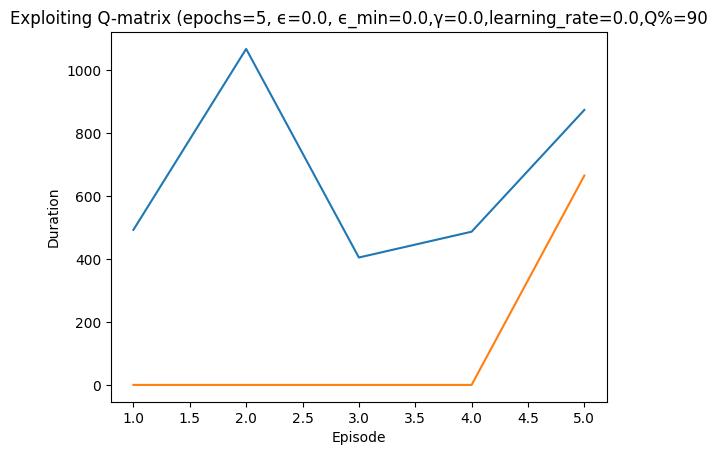

In [16]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [40]:
# Evaluate the Deep Q-learning agent
dql_run_200 = learner_m.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=200,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=200,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/200 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 873|reward: 6282.0|last_reward_at:  873|Elapsed Time: 0:00:08||


  Episode 1 ended at t=873 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/188 (0.05)
    explore-remote: 12/272 (0.04)
    explore-connect: 5/249 (0.02)
    exploit-local: 9/34 (0.21)
    exploit-remote: 5/58 (0.08)
    exploit-connect: 6/25 (0.19)
  exploit deflected to exploration: 3
  ## Episode: 2/200 'DQL' ϵ=0.7720, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 248|reward: 6250.0|last_reward_at:  248|Elapsed Time: 0:00:03||


  Episode 2 ended at t=248 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/43 (0.09)
    explore-remote: 10/74 (0.12)
    explore-connect: 0/58 (0.00)
    exploit-local: 15/1 (0.94)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/30 (0.27)
  exploit deflected to exploration: 1
  ## Episode: 3/200 'DQL' ϵ=0.7395, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 519|reward: 6296.0|last_reward_at:  519|Elapsed Time: 0:00:11||


  Episode 3 ended at t=519 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/97 (0.06)
    explore-remote: 19/131 (0.13)
    explore-connect: 1/139 (0.01)
    exploit-local: 14/5 (0.74)
    exploit-remote: 1/69 (0.01)
    exploit-connect: 10/27 (0.27)
  exploit deflected to exploration: 25
  ## Episode: 4/200 'DQL' ϵ=0.6764, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 740|reward: 6290.0|last_reward_at:  740|Elapsed Time: 0:00:12||


  Episode 4 ended at t=740 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/114 (0.07)
    explore-remote: 10/184 (0.05)
    explore-connect: 1/188 (0.01)
    exploit-local: 10/23 (0.30)
    exploit-remote: 9/152 (0.06)
    exploit-connect: 10/30 (0.25)
  exploit deflected to exploration: 28
  ## Episode: 5/200 'DQL' ϵ=0.5971, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 233|reward: 6276.0|last_reward_at:  233|Elapsed Time: 0:00:03||


  Episode 5 ended at t=233 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/42 (0.07)
    explore-remote: 8/47 (0.15)
    explore-connect: 1/37 (0.03)
    exploit-local: 14/12 (0.54)
    exploit-remote: 11/33 (0.25)
    exploit-connect: 10/15 (0.40)
  exploit deflected to exploration: 7
  ## Episode: 6/200 'DQL' ϵ=0.5745, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 264|reward: 6234.0|last_reward_at:  264|Elapsed Time: 0:00:04||


  Episode 6 ended at t=264 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/38 (0.16)
    explore-remote: 6/54 (0.10)
    explore-connect: 0/60 (0.00)
    exploit-local: 9/21 (0.30)
    exploit-remote: 6/43 (0.12)
    exploit-connect: 11/9 (0.55)
  exploit deflected to exploration: 25
  ## Episode: 7/200 'DQL' ϵ=0.5501, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 219|reward: 6270.0|last_reward_at:  219|Elapsed Time: 0:00:03||


  Episode 7 ended at t=219 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/34 (0.13)
    explore-remote: 6/33 (0.15)
    explore-connect: 1/44 (0.02)
    exploit-local: 14/17 (0.45)
    exploit-remote: 10/32 (0.24)
    exploit-connect: 10/13 (0.43)
  exploit deflected to exploration: 1
  ## Episode: 8/200 'DQL' ϵ=0.5308, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 172|reward: 6238.0|last_reward_at:  172|Elapsed Time: 0:00:02||


  Episode 8 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/25 (0.11)
    explore-remote: 9/23 (0.28)
    explore-connect: 0/36 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 6/20 (0.23)
    exploit-connect: 11/19 (0.37)
  exploit deflected to exploration: 3
  ## Episode: 9/200 'DQL' ϵ=0.5162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 626|reward: 6296.0|last_reward_at:  626|Elapsed Time: 0:00:14||


  Episode 9 ended at t=626 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/91 (0.08)
    explore-remote: 8/111 (0.07)
    explore-connect: 1/128 (0.01)
    exploit-local: 12/71 (0.14)
    exploit-remote: 12/168 (0.07)
    exploit-connect: 10/6 (0.62)
  exploit deflected to exploration: 42
  ## Episode: 10/200 'DQL' ϵ=0.4672, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 437|reward: 6270.0|last_reward_at:  437|Elapsed Time: 0:00:06||


  Episode 10 ended at t=437 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/56 (0.08)
    explore-remote: 7/75 (0.09)
    explore-connect: 2/67 (0.03)
    exploit-local: 13/21 (0.38)
    exploit-remote: 8/154 (0.05)
    exploit-connect: 9/20 (0.31)
  exploit deflected to exploration: 9
  ## Episode: 11/200 'DQL' ϵ=0.4365, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 304|reward: 6294.0|last_reward_at:  304|Elapsed Time: 0:00:05||


  Episode 11 ended at t=304 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/32 (0.11)
    explore-remote: 10/45 (0.18)
    explore-connect: 0/43 (0.00)
    exploit-local: 16/31 (0.34)
    exploit-remote: 10/68 (0.13)
    exploit-connect: 11/34 (0.24)
  exploit deflected to exploration: 0
  ## Episode: 12/200 'DQL' ϵ=0.4167, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 382|reward: 6276.0|last_reward_at:  382|Elapsed Time: 0:00:06||


  Episode 12 ended at t=382 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/48 (0.04)
    explore-remote: 6/49 (0.11)
    explore-connect: 0/42 (0.00)
    exploit-local: 15/80 (0.16)
    exploit-remote: 12/93 (0.11)
    exploit-connect: 11/24 (0.31)
  exploit deflected to exploration: 1
  ## Episode: 13/200 'DQL' ϵ=0.3934, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 230|reward: 6246.0|last_reward_at:  230|Elapsed Time: 0:00:03||


  Episode 13 ended at t=230 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/19 (0.14)
    explore-remote: 5/43 (0.10)
    explore-connect: 0/33 (0.00)
    exploit-local: 13/20 (0.39)
    exploit-remote: 8/40 (0.17)
    exploit-connect: 11/35 (0.24)
  exploit deflected to exploration: 1
  ## Episode: 14/200 'DQL' ϵ=0.3802, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 320|reward: 6250.0|last_reward_at:  320|Elapsed Time: 0:00:05||


  Episode 14 ended at t=320 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/23 (0.15)
    explore-remote: 12/52 (0.19)
    explore-connect: 0/51 (0.00)
    exploit-local: 13/43 (0.23)
    exploit-remote: 4/66 (0.06)
    exploit-connect: 11/41 (0.21)
  exploit deflected to exploration: 19
  ## Episode: 15/200 'DQL' ϵ=0.3628, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 237|reward: 6248.0|last_reward_at:  237|Elapsed Time: 0:00:03||


  Episode 15 ended at t=237 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/17 (0.11)
    explore-remote: 5/25 (0.17)
    explore-connect: 0/27 (0.00)
    exploit-local: 13/13 (0.50)
    exploit-remote: 11/62 (0.15)
    exploit-connect: 11/51 (0.18)
  exploit deflected to exploration: 0
  ## Episode: 16/200 'DQL' ϵ=0.3506, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 149|reward: 6250.0|last_reward_at:  149|Elapsed Time: 0:00:02||


  Episode 16 ended at t=149 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/13 (0.28)
    explore-remote: 6/13 (0.32)
    explore-connect: 1/14 (0.07)
    exploit-local: 11/4 (0.73)
    exploit-remote: 9/45 (0.17)
    exploit-connect: 10/18 (0.36)
  exploit deflected to exploration: 2
  ## Episode: 17/200 'DQL' ϵ=0.3433, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 220|reward: 6286.0|last_reward_at:  220|Elapsed Time: 0:00:04||


  Episode 17 ended at t=220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/16 (0.16)
    explore-remote: 3/31 (0.09)
    explore-connect: 0/31 (0.00)
    exploit-local: 16/19 (0.46)
    exploit-remote: 16/47 (0.25)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 0
  ## Episode: 18/200 'DQL' ϵ=0.3328, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 175|reward: 6260.0|last_reward_at:  175|Elapsed Time: 0:00:03||


  Episode 18 ended at t=175 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/21 (0.09)
    explore-remote: 5/17 (0.23)
    explore-connect: 0/19 (0.00)
    exploit-local: 14/8 (0.64)
    exploit-remote: 12/39 (0.24)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 0
  ## Episode: 19/200 'DQL' ϵ=0.3248, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 120|reward: 6252.0|last_reward_at:  120|Elapsed Time: 0:00:01||


  Episode 19 ended at t=120 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 6/13 (0.32)
    explore-connect: 0/13 (0.00)
    exploit-local: 15/8 (0.65)
    exploit-remote: 9/18 (0.33)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 0
  ## Episode: 20/200 'DQL' ϵ=0.3195, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 110|reward: 6224.0|last_reward_at:  110|Elapsed Time: 0:00:02||


  Episode 20 ended at t=110 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 5/8 (0.38)
    explore-connect: 0/11 (0.00)
    exploit-local: 15/4 (0.79)
    exploit-remote: 8/18 (0.31)
    exploit-connect: 11/25 (0.31)
  exploit deflected to exploration: 0
  ## Episode: 21/200 'DQL' ϵ=0.3147, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 274|reward: 6244.0|last_reward_at:  274|Elapsed Time: 0:00:04||


  Episode 21 ended at t=274 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/21 (0.12)
    explore-remote: 5/31 (0.14)
    explore-connect: 0/30 (0.00)
    exploit-local: 12/18 (0.40)
    exploit-remote: 11/69 (0.14)
    exploit-connect: 11/63 (0.15)
  exploit deflected to exploration: 0
  ## Episode: 22/200 'DQL' ϵ=0.3032, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 146|reward: 6252.0|last_reward_at:  146|Elapsed Time: 0:00:02||


  Episode 22 ended at t=146 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 6/10 (0.38)
    explore-connect: 0/9 (0.00)
    exploit-local: 14/4 (0.78)
    exploit-remote: 12/31 (0.28)
    exploit-connect: 11/39 (0.22)
  exploit deflected to exploration: 0
  ## Episode: 23/200 'DQL' ϵ=0.2974, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 176|reward: 6266.0|last_reward_at:  176|Elapsed Time: 0:00:03||


  Episode 23 ended at t=176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 10/14 (0.42)
    explore-connect: 0/12 (0.00)
    exploit-local: 14/12 (0.54)
    exploit-remote: 9/40 (0.18)
    exploit-connect: 11/37 (0.23)
  exploit deflected to exploration: 0
  ## Episode: 24/200 'DQL' ϵ=0.2906, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 171|reward: 6232.0|last_reward_at:  171|Elapsed Time: 0:00:02||


  Episode 24 ended at t=171 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/21 (0.09)
    explore-remote: 2/18 (0.10)
    explore-connect: 0/14 (0.00)
    exploit-local: 12/9 (0.57)
    exploit-remote: 12/36 (0.25)
    exploit-connect: 11/34 (0.24)
  exploit deflected to exploration: 1
  ## Episode: 25/200 'DQL' ϵ=0.2842, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 148|reward: 6230.0|last_reward_at:  148|Elapsed Time: 0:00:02||


  Episode 25 ended at t=148 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/16 (0.20)
    explore-connect: 0/22 (0.00)
    exploit-local: 12/6 (0.67)
    exploit-remote: 10/31 (0.24)
    exploit-connect: 11/29 (0.28)
  exploit deflected to exploration: 1
  ## Episode: 26/200 'DQL' ϵ=0.2788, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 158|reward: 6272.0|last_reward_at:  158|Elapsed Time: 0:00:03||


  Episode 26 ended at t=158 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/11 (0.27)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/19 (0.00)
    exploit-local: 14/10 (0.58)
    exploit-remote: 14/32 (0.30)
    exploit-connect: 11/36 (0.23)
  exploit deflected to exploration: 0
  ## Episode: 27/200 'DQL' ϵ=0.2732, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 221|reward: 6266.0|last_reward_at:  221|Elapsed Time: 0:00:03||


  Episode 27 ended at t=221 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/18 (0.25)
    explore-remote: 2/11 (0.15)
    explore-connect: 0/24 (0.00)
    exploit-local: 11/9 (0.55)
    exploit-remote: 15/80 (0.16)
    exploit-connect: 11/34 (0.24)
  exploit deflected to exploration: 0
  ## Episode: 28/200 'DQL' ϵ=0.2657, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 285|reward: 6266.0|last_reward_at:  285|Elapsed Time: 0:00:05||


  Episode 28 ended at t=285 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/20 (0.13)
    explore-remote: 10/25 (0.29)
    explore-connect: 0/21 (0.00)
    exploit-local: 14/19 (0.42)
    exploit-remote: 8/82 (0.09)
    exploit-connect: 11/72 (0.13)
  exploit deflected to exploration: 0
  ## Episode: 29/200 'DQL' ϵ=0.2566, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 292|reward: 6278.0|last_reward_at:  292|Elapsed Time: 0:00:07||


  Episode 29 ended at t=292 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 4/33 (0.11)
    explore-connect: 0/31 (0.00)
    exploit-local: 14/30 (0.32)
    exploit-remote: 16/110 (0.13)
    exploit-connect: 11/26 (0.30)
  exploit deflected to exploration: 17
  ## Episode: 30/200 'DQL' ϵ=0.2477, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 209|reward: 6262.0|last_reward_at:  209|Elapsed Time: 0:00:03||


  Episode 30 ended at t=209 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 5/14 (0.26)
    explore-connect: 1/22 (0.04)
    exploit-local: 14/6 (0.70)
    exploit-remote: 14/69 (0.17)
    exploit-connect: 10/43 (0.19)
  exploit deflected to exploration: 0
  ## Episode: 31/200 'DQL' ϵ=0.2416, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 288|reward: 6266.0|last_reward_at:  288|Elapsed Time: 0:00:04||


  Episode 31 ended at t=288 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 3/16 (0.16)
    explore-connect: 0/24 (0.00)
    exploit-local: 13/29 (0.31)
    exploit-remote: 15/145 (0.09)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 1
  ## Episode: 32/200 'DQL' ϵ=0.2337, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 374|reward: 6282.0|last_reward_at:  374|Elapsed Time: 0:00:06||


  Episode 32 ended at t=374 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 3/31 (0.09)
    explore-connect: 0/31 (0.00)
    exploit-local: 16/36 (0.31)
    exploit-remote: 17/172 (0.09)
    exploit-connect: 11/32 (0.26)
  exploit deflected to exploration: 0
  ## Episode: 33/200 'DQL' ϵ=0.2241, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 332|reward: 6272.0|last_reward_at:  332|Elapsed Time: 0:00:05||


  Episode 33 ended at t=332 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 6/25 (0.19)
    explore-connect: 1/30 (0.03)
    exploit-local: 15/22 (0.41)
    exploit-remote: 13/147 (0.08)
    exploit-connect: 10/45 (0.18)
  exploit deflected to exploration: 0
  ## Episode: 34/200 'DQL' ϵ=0.2161, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 411|reward: 6302.0|last_reward_at:  411|Elapsed Time: 0:00:06||


  Episode 34 ended at t=411 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 6/25 (0.19)
    explore-connect: 0/27 (0.00)
    exploit-local: 19/59 (0.24)
    exploit-remote: 14/202 (0.06)
    exploit-connect: 11/26 (0.30)
  exploit deflected to exploration: 0
  ## Episode: 35/200 'DQL' ϵ=0.2069, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 225|reward: 6288.0|last_reward_at:  225|Elapsed Time: 0:00:04||


  Episode 35 ended at t=225 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 4/25 (0.14)
    explore-connect: 0/13 (0.00)
    exploit-local: 17/33 (0.34)
    exploit-remote: 16/65 (0.20)
    exploit-connect: 11/26 (0.30)
  exploit deflected to exploration: 0
  ## Episode: 36/200 'DQL' ϵ=0.2022, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 517|reward: 6244.0|last_reward_at:  517|Elapsed Time: 0:00:09||


  Episode 36 ended at t=517 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/36 (0.08)
    explore-remote: 1/53 (0.02)
    explore-connect: 0/58 (0.00)
    exploit-local: 12/106 (0.10)
    exploit-remote: 13/209 (0.06)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 41
  ## Episode: 37/200 'DQL' ϵ=0.1922, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 106|reward: 6242.0|last_reward_at:  106|Elapsed Time: 0:00:01||


  Episode 37 ended at t=106 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/5 (0.44)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 12/24 (0.33)
    exploit-connect: 11/17 (0.39)
  exploit deflected to exploration: 0
  ## Episode: 38/200 'DQL' ϵ=0.1903, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 157|reward: 6242.0|last_reward_at:  157|Elapsed Time: 0:00:02||


  Episode 38 ended at t=157 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/9 (0.10)
    explore-connect: 0/8 (0.00)
    exploit-local: 12/7 (0.63)
    exploit-remote: 16/70 (0.19)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 0
  ## Episode: 39/200 'DQL' ϵ=0.1875, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 331|reward: 6268.0|last_reward_at:  331|Elapsed Time: 0:00:05||


  Episode 39 ended at t=331 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/17 (0.11)
    explore-remote: 3/20 (0.13)
    explore-connect: 0/24 (0.00)
    exploit-local: 14/5 (0.74)
    exploit-remote: 15/159 (0.09)
    exploit-connect: 11/61 (0.15)
  exploit deflected to exploration: 0
  ## Episode: 40/200 'DQL' ϵ=0.1819, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 118|reward: 6238.0|last_reward_at:  118|Elapsed Time: 0:00:02||


  Episode 40 ended at t=118 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 13/39 (0.25)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 0
  ## Episode: 41/200 'DQL' ϵ=0.1800, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 158|reward: 6256.0|last_reward_at:  158|Elapsed Time: 0:00:02||


  Episode 41 ended at t=158 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/8 (0.38)
    explore-remote: 4/5 (0.44)
    explore-connect: 1/13 (0.07)
    exploit-local: 10/2 (0.83)
    exploit-remote: 14/67 (0.17)
    exploit-connect: 10/19 (0.34)
  exploit deflected to exploration: 2
  ## Episode: 42/200 'DQL' ϵ=0.1775, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 135|reward: 6230.0|last_reward_at:  135|Elapsed Time: 0:00:02||


  Episode 42 ended at t=135 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 13/66 (0.16)
    exploit-connect: 11/9 (0.55)
  exploit deflected to exploration: 0
  ## Episode: 43/200 'DQL' ϵ=0.1754, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 143|reward: 6242.0|last_reward_at:  143|Elapsed Time: 0:00:02||


  Episode 43 ended at t=143 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/10 (0.17)
    explore-connect: 0/7 (0.00)
    exploit-local: 14/8 (0.64)
    exploit-remote: 12/51 (0.19)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 0
  ## Episode: 44/200 'DQL' ϵ=0.1733, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 99|reward: 6230.0|last_reward_at:   99|Elapsed Time: 0:00:01||


  Episode 44 ended at t=99 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 10/30 (0.25)
    exploit-connect: 11/23 (0.32)
  exploit deflected to exploration: 0
  ## Episode: 45/200 'DQL' ϵ=0.1718, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 186|reward: 6250.0|last_reward_at:  186|Elapsed Time: 0:00:05||


  Episode 45 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 5/9 (0.36)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 15/106 (0.12)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 11
  ## Episode: 46/200 'DQL' ϵ=0.1692, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 190|reward: 6214.0|last_reward_at:  190|Elapsed Time: 0:00:02||


  Episode 46 ended at t=190 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/15 (0.12)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/3 (0.79)
    exploit-remote: 11/57 (0.16)
    exploit-connect: 11/65 (0.14)
  exploit deflected to exploration: 2
  ## Episode: 47/200 'DQL' ϵ=0.1666, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 108|reward: 6216.0|last_reward_at:  108|Elapsed Time: 0:00:02||


  Episode 47 ended at t=108 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/8 (0.20)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 11/32 (0.26)
    exploit-connect: 11/22 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 48/200 'DQL' ϵ=0.1652, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 98|reward: 6220.0|last_reward_at:   98|Elapsed Time: 0:00:01||


  Episode 48 ended at t=98 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 13/20 (0.39)
    exploit-connect: 11/23 (0.32)
  exploit deflected to exploration: 0
  ## Episode: 49/200 'DQL' ϵ=0.1639, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 103|reward: 6218.0|last_reward_at:  103|Elapsed Time: 0:00:01||


  Episode 49 ended at t=103 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 8/37 (0.18)
    exploit-connect: 11/17 (0.39)
  exploit deflected to exploration: 0
  ## Episode: 50/200 'DQL' ϵ=0.1626, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 82|reward: 6202.0|last_reward_at:   82|Elapsed Time: 0:00:01||


  Episode 50 ended at t=82 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 8/17 (0.32)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 0
  ## Episode: 51/200 'DQL' ϵ=0.1616, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 51|Iteration 130|reward: 6212.0|last_reward_at:  130|Elapsed Time: 0:00:02||


  Episode 51 ended at t=130 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 4/5 (0.44)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/2 (0.85)
    exploit-remote: 9/48 (0.16)
    exploit-connect: 11/20 (0.35)
  exploit deflected to exploration: 0
  ## Episode: 52/200 'DQL' ϵ=0.1600, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 52|Iteration 104|reward: 6214.0|last_reward_at:  104|Elapsed Time: 0:00:01||


  Episode 52 ended at t=104 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 2/5 (0.29)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 9/41 (0.18)
    exploit-connect: 11/10 (0.52)
  exploit deflected to exploration: 0
  ## Episode: 53/200 'DQL' ϵ=0.1588, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 53|Iteration 88|reward: 6216.0|last_reward_at:   88|Elapsed Time: 0:00:01||


  Episode 53 ended at t=88 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 11/32 (0.26)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 0
  ## Episode: 54/200 'DQL' ϵ=0.1578, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 54|Iteration 83|reward: 6204.0|last_reward_at:   83|Elapsed Time: 0:00:01||


  Episode 54 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 9/29 (0.24)
    exploit-connect: 11/12 (0.48)
  exploit deflected to exploration: 0
  ## Episode: 55/200 'DQL' ϵ=0.1568, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 55|Iteration 202|reward: 6222.0|last_reward_at:  202|Elapsed Time: 0:00:02||


  Episode 55 ended at t=202 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/19 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 12/105 (0.10)
    exploit-connect: 11/29 (0.28)
  exploit deflected to exploration: 0
  ## Episode: 56/200 'DQL' ϵ=0.1546, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 56|Iteration 91|reward: 6204.0|last_reward_at:   91|Elapsed Time: 0:00:01||


  Episode 56 ended at t=91 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/6 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 10/36 (0.22)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 57/200 'DQL' ϵ=0.1536, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 57|Iteration 154|reward: 6248.0|last_reward_at:  154|Elapsed Time: 0:00:02||


  Episode 57 ended at t=154 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/9 (0.18)
    explore-connect: 0/5 (0.00)
    exploit-local: 13/0 (1.00)
    exploit-remote: 15/88 (0.15)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 58/200 'DQL' ϵ=0.1520, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 58|Iteration 146|reward: 6236.0|last_reward_at:  146|Elapsed Time: 0:00:02||


  Episode 58 ended at t=146 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/5 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 14/79 (0.15)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 0
  ## Episode: 59/200 'DQL' ϵ=0.1505, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 59|Iteration 137|reward: 6216.0|last_reward_at:  137|Elapsed Time: 0:00:02||


  Episode 59 ended at t=137 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/9 (0.18)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/2 (0.85)
    exploit-remote: 12/66 (0.15)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 60/200 'DQL' ϵ=0.1491, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 60|Iteration 87|reward: 6220.0|last_reward_at:   87|Elapsed Time: 0:00:01||


  Episode 60 ended at t=87 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 14/33 (0.30)
    exploit-connect: 11/10 (0.52)
  exploit deflected to exploration: 0
  ## Episode: 61/200 'DQL' ϵ=0.1483, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 61|Iteration 213|reward: 6248.0|last_reward_at:  213|Elapsed Time: 0:00:03||


  Episode 61 ended at t=213 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 2/9 (0.18)
    explore-connect: 0/12 (0.00)
    exploit-local: 14/19 (0.42)
    exploit-remote: 13/121 (0.10)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 62/200 'DQL' ϵ=0.1462, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 62|Iteration 41|reward: 6172.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 62 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 2/9 (0.18)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 63/200 'DQL' ϵ=0.1459, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 63|Iteration 156|reward: 6256.0|last_reward_at:  156|Elapsed Time: 0:00:02||


  Episode 63 ended at t=156 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/7 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 15/85 (0.15)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 64/200 'DQL' ϵ=0.1445, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 64|Iteration 28|reward: 6172.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 64 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 65/200 'DQL' ϵ=0.1442, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 65|Iteration 84|reward: 6212.0|last_reward_at:   84|Elapsed Time: 0:00:01||


  Episode 65 ended at t=84 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/6 (0.00)
    exploit-local: 14/4 (0.78)
    exploit-remote: 5/33 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 66/200 'DQL' ϵ=0.1435, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 66|Iteration 100|reward: 6232.0|last_reward_at:  100|Elapsed Time: 0:00:01||


  Episode 66 ended at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 14/13 (0.52)
    exploit-remote: 14/38 (0.27)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 67/200 'DQL' ϵ=0.1426, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 67|Iteration 79|reward: 6244.0|last_reward_at:   79|Elapsed Time: 0:00:01||


  Episode 67 ended at t=79 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 15/17 (0.47)
    exploit-remote: 11/20 (0.35)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 68/200 'DQL' ϵ=0.1419, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 68|Iteration 33|reward: 6176.0|last_reward_at:   33|Elapsed Time: 0:00:00||


  Episode 68 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 69/200 'DQL' ϵ=0.1417, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 69|Iteration 26|reward: 6164.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 69 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 70/200 'DQL' ϵ=0.1415, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 70|Iteration 31|reward: 6182.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 70 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 13/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 71/200 'DQL' ϵ=0.1412, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 71|Iteration 47|reward: 6202.0|last_reward_at:   47|Elapsed Time: 0:00:00||


  Episode 71 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 9/5 (0.64)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 72/200 'DQL' ϵ=0.1408, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 72|Iteration 34|reward: 6178.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 72 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 73/200 'DQL' ϵ=0.1405, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 73|Iteration 35|reward: 6168.0|last_reward_at:   35|Elapsed Time: 0:00:00||


  Episode 73 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/3 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 74/200 'DQL' ϵ=0.1403, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 74|Iteration 34|reward: 6172.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 74 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/8 (0.62)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 75/200 'DQL' ϵ=0.1400, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 75|Iteration 26|reward: 6162.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 75 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 76/200 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 76|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 76 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 77/200 'DQL' ϵ=0.1396, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 77|Iteration 31|reward: 6154.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 77 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 78/200 'DQL' ϵ=0.1393, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 78|Iteration 24|reward: 6154.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 78 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 79/200 'DQL' ϵ=0.1391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 79|Iteration 30|reward: 6160.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 79 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 80/200 'DQL' ϵ=0.1389, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 80|Iteration 25|reward: 6154.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 80 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 81/200 'DQL' ϵ=0.1387, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 81|Iteration 918|reward: 6240.0|last_reward_at:  918|Elapsed Time: 0:00:14||


  Episode 81 ended at t=918 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/36 (0.12)
    explore-remote: 8/43 (0.16)
    explore-connect: 0/42 (0.00)
    exploit-local: 11/47 (0.19)
    exploit-remote: 5/273 (0.02)
    exploit-connect: 11/437 (0.02)
  exploit deflected to exploration: 0
  ## Episode: 82/200 'DQL' ϵ=0.1322, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 82|Iteration 52|reward: 6198.0|last_reward_at:   52|Elapsed Time: 0:00:00||


  Episode 82 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 13/6 (0.68)
    exploit-remote: 7/8 (0.47)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 83/200 'DQL' ϵ=0.1319, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 83|Iteration 56|reward: 6208.0|last_reward_at:   56|Elapsed Time: 0:00:01||


  Episode 83 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/2 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 10/12 (0.45)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 84/200 'DQL' ϵ=0.1315, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 84|Iteration 182|reward: 6218.0|last_reward_at:  182|Elapsed Time: 0:00:02||


  Episode 84 ended at t=182 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/7 (0.22)
    explore-connect: 0/11 (0.00)
    exploit-local: 10/26 (0.28)
    exploit-remote: 13/54 (0.19)
    exploit-connect: 11/41 (0.21)
  exploit deflected to exploration: 6
  ## Episode: 85/200 'DQL' ϵ=0.1304, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 85|Iteration 32|reward: 6172.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 85 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/2 (0.71)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 86/200 'DQL' ϵ=0.1302, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 86|Iteration 26|reward: 6156.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 86 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 87/200 'DQL' ϵ=0.1300, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 87|Iteration 36|reward: 6182.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 87 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/4 (0.56)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 88/200 'DQL' ϵ=0.1298, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 88|Iteration 48|reward: 6180.0|last_reward_at:   48|Elapsed Time: 0:00:00||


  Episode 88 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/2 (0.85)
    exploit-remote: 6/12 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 89/200 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 89|Iteration 45|reward: 6184.0|last_reward_at:   45|Elapsed Time: 0:00:00||


  Episode 89 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 6/12 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 90/200 'DQL' ϵ=0.1293, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 90|Iteration 25|reward: 6162.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 90 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 91/200 'DQL' ϵ=0.1291, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 91|Iteration 36|reward: 6172.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 91 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/6 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 92/200 'DQL' ϵ=0.1289, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 92|Iteration 64|reward: 6192.0|last_reward_at:   64|Elapsed Time: 0:00:01||


  Episode 92 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 8/24 (0.25)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 93/200 'DQL' ϵ=0.1286, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 93|Iteration 41|reward: 6184.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 93 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 6/3 (0.67)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 94/200 'DQL' ϵ=0.1283, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 94|Iteration 61|reward: 6220.0|last_reward_at:   61|Elapsed Time: 0:00:01||


  Episode 94 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/6 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 11/14 (0.44)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 95/200 'DQL' ϵ=0.1280, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 95|Iteration 59|reward: 6182.0|last_reward_at:   59|Elapsed Time: 0:00:01||


  Episode 95 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 6/24 (0.20)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 96/200 'DQL' ϵ=0.1277, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 96|Iteration 46|reward: 6194.0|last_reward_at:   46|Elapsed Time: 0:00:00||


  Episode 96 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 9/11 (0.45)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 97/200 'DQL' ϵ=0.1274, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 97|Iteration 46|reward: 6176.0|last_reward_at:   46|Elapsed Time: 0:00:00||


  Episode 97 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 3/12 (0.20)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 98/200 'DQL' ϵ=0.1272, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 98|Iteration 46|reward: 6178.0|last_reward_at:   46|Elapsed Time: 0:00:00||


  Episode 98 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 4/15 (0.21)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 99/200 'DQL' ϵ=0.1269, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 99|Iteration 40|reward: 6184.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 99 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 4/8 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 100/200 'DQL' ϵ=0.1267, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 100|Iteration 78|reward: 6216.0|last_reward_at:   78|Elapsed Time: 0:00:01||


  Episode 100 ended at t=78 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 9/38 (0.19)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 101/200 'DQL' ϵ=0.1263, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 101|Iteration 51|reward: 6190.0|last_reward_at:   51|Elapsed Time: 0:00:00||


  Episode 101 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/15 (0.25)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 102/200 'DQL' ϵ=0.1260, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 102|Iteration 39|reward: 6176.0|last_reward_at:   39|Elapsed Time: 0:00:00||


  Episode 102 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/8 (0.38)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 103/200 'DQL' ϵ=0.1258, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 103|Iteration 69|reward: 6218.0|last_reward_at:   69|Elapsed Time: 0:00:01||


  Episode 103 ended at t=69 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 13/0 (1.00)
    exploit-remote: 9/31 (0.23)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 104/200 'DQL' ϵ=0.1255, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 104|Iteration 97|reward: 6220.0|last_reward_at:   97|Elapsed Time: 0:00:01||


  Episode 104 ended at t=97 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/5 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 10/52 (0.16)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 105/200 'DQL' ϵ=0.1250, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 105|Iteration 73|reward: 6194.0|last_reward_at:   73|Elapsed Time: 0:00:01||


  Episode 105 ended at t=73 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 7/31 (0.18)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 106/200 'DQL' ϵ=0.1246, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 106|Iteration 47|reward: 6168.0|last_reward_at:   47|Elapsed Time: 0:00:01||


  Episode 106 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/13 (0.19)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 107/200 'DQL' ϵ=0.1244, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 107|Iteration 35|reward: 6168.0|last_reward_at:   35|Elapsed Time: 0:00:00||


  Episode 107 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 108/200 'DQL' ϵ=0.1242, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 108|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 108 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 109/200 'DQL' ϵ=0.1241, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 109|Iteration 43|reward: 6196.0|last_reward_at:   43|Elapsed Time: 0:00:00||


  Episode 109 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 8/8 (0.50)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 110/200 'DQL' ϵ=0.1239, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 110|Iteration 26|reward: 6162.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 110 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 111/200 'DQL' ϵ=0.1238, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 111|Iteration 33|reward: 6170.0|last_reward_at:   33|Elapsed Time: 0:00:00||


  Episode 111 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 112/200 'DQL' ϵ=0.1236, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 112|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 112 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 113/200 'DQL' ϵ=0.1235, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 113|Iteration 53|reward: 6188.0|last_reward_at:   53|Elapsed Time: 0:00:02||


  Episode 113 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 6/5 (0.55)
    explore-connect: 1/6 (0.14)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/4 (0.43)
    exploit-connect: 10/3 (0.77)
  exploit deflected to exploration: 14
  ## Episode: 114/200 'DQL' ϵ=0.1232, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 114|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 114 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 115/200 'DQL' ϵ=0.1231, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 115|Iteration 29|reward: 6160.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 115 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 116/200 'DQL' ϵ=0.1230, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 116|Iteration 23|reward: 6160.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 116 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 117/200 'DQL' ϵ=0.1229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 117|Iteration 26|reward: 6160.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 117 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 118/200 'DQL' ϵ=0.1228, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 118|Iteration 30|reward: 6174.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 118 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 119/200 'DQL' ϵ=0.1227, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 119|Iteration 23|reward: 6156.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 119 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 120/200 'DQL' ϵ=0.1225, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 120|Iteration 25|reward: 6158.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 120 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 121/200 'DQL' ϵ=0.1224, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 121|Iteration 24|reward: 6160.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 121 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 122/200 'DQL' ϵ=0.1223, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 122|Iteration 23|reward: 6160.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 122 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 123/200 'DQL' ϵ=0.1222, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 123|Iteration 24|reward: 6154.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 123 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 124/200 'DQL' ϵ=0.1221, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 124|Iteration 31|reward: 6162.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 124 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 3
  ## Episode: 125/200 'DQL' ϵ=0.1220, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 125|Iteration 62|reward: 6192.0|last_reward_at:   62|Elapsed Time: 0:00:01||


  Episode 125 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 5/12 (0.29)
    explore-connect: 1/11 (0.08)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 24
  ## Episode: 126/200 'DQL' ϵ=0.1217, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 126|Iteration 29|reward: 6154.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 126 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 0
  ## Episode: 127/200 'DQL' ϵ=0.1216, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 127|Iteration 24|reward: 6156.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 127 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 128/200 'DQL' ϵ=0.1215, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 128|Iteration 31|reward: 6156.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 128 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 1
  ## Episode: 129/200 'DQL' ϵ=0.1213, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 129|Iteration 27|reward: 6158.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 129 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 130/200 'DQL' ϵ=0.1212, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 130|Iteration 28|reward: 6154.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 130 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 131/200 'DQL' ϵ=0.1211, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 131|Iteration 27|reward: 6160.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 131 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 132/200 'DQL' ϵ=0.1210, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 132|Iteration 28|reward: 6160.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 132 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 133/200 'DQL' ϵ=0.1209, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 133|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 133 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 134/200 'DQL' ϵ=0.1208, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 134|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 134 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 1
  ## Episode: 135/200 'DQL' ϵ=0.1207, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 135|Iteration 350|reward: 6180.0|last_reward_at:  350|Elapsed Time: 0:00:05||


  Episode 135 ended at t=350 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/10 (0.17)
    explore-connect: 1/21 (0.05)
    exploit-local: 11/55 (0.17)
    exploit-remote: 3/225 (0.01)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 3
  ## Episode: 136/200 'DQL' ϵ=0.1193, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 136|Iteration 27|reward: 6156.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 136 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 137/200 'DQL' ϵ=0.1192, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 137|Iteration 25|reward: 6158.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 137 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 138/200 'DQL' ϵ=0.1191, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 138|Iteration 26|reward: 6166.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 138 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 139/200 'DQL' ϵ=0.1190, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 139|Iteration 30|reward: 6166.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 139 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 140/200 'DQL' ϵ=0.1189, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 140|Iteration 38|reward: 6188.0|last_reward_at:   38|Elapsed Time: 0:00:00||


  Episode 140 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 5/6 (0.45)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 141/200 'DQL' ϵ=0.1187, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 141|Iteration 25|reward: 6154.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 141 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 142/200 'DQL' ϵ=0.1186, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 142|Iteration 28|reward: 6172.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 142 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 143/200 'DQL' ϵ=0.1185, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 143|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 143 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 144/200 'DQL' ϵ=0.1184, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 144|Iteration 24|reward: 6156.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 144 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 145/200 'DQL' ϵ=0.1183, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 145|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 145 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 146/200 'DQL' ϵ=0.1183, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 146|Iteration 28|reward: 6154.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 146 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 147/200 'DQL' ϵ=0.1182, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 147|Iteration 24|reward: 6158.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 147 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 148/200 'DQL' ϵ=0.1181, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 148|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 148 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 149/200 'DQL' ϵ=0.1180, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 149|Iteration 24|reward: 6154.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 149 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 150/200 'DQL' ϵ=0.1179, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 150|Iteration 26|reward: 6158.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 150 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 151/200 'DQL' ϵ=0.1178, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 151|Iteration 30|reward: 6168.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 151 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 152/200 'DQL' ϵ=0.1177, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 152|Iteration 29|reward: 6164.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 152 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 153/200 'DQL' ϵ=0.1176, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 153|Iteration 30|reward: 6154.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 153 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 154/200 'DQL' ϵ=0.1175, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 154|Iteration 29|reward: 6172.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 154 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 155/200 'DQL' ϵ=0.1174, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 155|Iteration 23|reward: 6158.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 155 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 156/200 'DQL' ϵ=0.1173, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 156|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 156 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 157/200 'DQL' ϵ=0.1172, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 157|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 157 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 158/200 'DQL' ϵ=0.1172, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 158|Iteration 28|reward: 6164.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 158 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 159/200 'DQL' ϵ=0.1171, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 159|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 159 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 160/200 'DQL' ϵ=0.1170, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 160|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 160 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 161/200 'DQL' ϵ=0.1169, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 161|Iteration 790|reward: 6280.0|last_reward_at:  790|Elapsed Time: 0:00:14||


  Episode 161 ended at t=790 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/24 (0.11)
    explore-remote: 6/22 (0.21)
    explore-connect: 0/35 (0.00)
    exploit-local: 17/103 (0.14)
    exploit-remote: 11/557 (0.02)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 162/200 'DQL' ϵ=0.1144, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 162|Iteration 59|reward: 6212.0|last_reward_at:   59|Elapsed Time: 0:00:01||


  Episode 162 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 16/0 (1.00)
    exploit-remote: 6/12 (0.33)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 163/200 'DQL' ϵ=0.1143, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 163|Iteration 31|reward: 6186.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 163 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 16/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 164/200 'DQL' ϵ=0.1142, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 164|Iteration 34|reward: 6184.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 164 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 16/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 165/200 'DQL' ϵ=0.1141, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 165|Iteration 32|reward: 6190.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 165 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 16/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 166/200 'DQL' ϵ=0.1140, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 166|Iteration 25|reward: 6172.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 166 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 14/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 167/200 'DQL' ϵ=0.1139, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 167|Iteration 25|reward: 6156.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 167 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 168/200 'DQL' ϵ=0.1138, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 168|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 168 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 169/200 'DQL' ϵ=0.1138, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 169|Iteration 31|reward: 6170.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 169 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 1
  ## Episode: 170/200 'DQL' ϵ=0.1137, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 170|Iteration 27|reward: 6156.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 170 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 171/200 'DQL' ϵ=0.1136, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 171|Iteration 29|reward: 6156.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 171 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 4
  ## Episode: 172/200 'DQL' ϵ=0.1135, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 172|Iteration 32|reward: 6154.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 172 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 7
  ## Episode: 173/200 'DQL' ϵ=0.1135, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 173|Iteration 33|reward: 6156.0|last_reward_at:   33|Elapsed Time: 0:00:00||


  Episode 173 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 3
  ## Episode: 174/200 'DQL' ϵ=0.1134, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 174|Iteration 87|reward: 6162.0|last_reward_at:   87|Elapsed Time: 0:00:01||


  Episode 174 ended at t=87 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/23 (0.12)
    explore-connect: 1/9 (0.10)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/16 (0.00)
    exploit-connect: 10/7 (0.59)
  exploit deflected to exploration: 31
  ## Episode: 175/200 'DQL' ϵ=0.1131, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 175|Iteration 24|reward: 6156.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 175 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 176/200 'DQL' ϵ=0.1131, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 176|Iteration 25|reward: 6160.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 176 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 177/200 'DQL' ϵ=0.1130, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 177|Iteration 29|reward: 6178.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 177 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 5/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 178/200 'DQL' ϵ=0.1129, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 178|Iteration 32|reward: 6164.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 178 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 1/4 (0.20)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 179/200 'DQL' ϵ=0.1129, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 179|Iteration 27|reward: 6160.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 179 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 180/200 'DQL' ϵ=0.1128, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 180|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 180 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 181/200 'DQL' ϵ=0.1127, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 181|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 181 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 182/200 'DQL' ϵ=0.1127, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 182|Iteration 28|reward: 6160.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 182 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 183/200 'DQL' ϵ=0.1126, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 183|Iteration 29|reward: 6156.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 183 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 184/200 'DQL' ϵ=0.1125, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 184|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 184 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 185/200 'DQL' ϵ=0.1125, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 185|Iteration 25|reward: 6162.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 185 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 186/200 'DQL' ϵ=0.1124, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 186|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 186 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 187/200 'DQL' ϵ=0.1123, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 187|Iteration 181|reward: 6178.0|last_reward_at:  181|Elapsed Time: 0:00:03||


  Episode 187 ended at t=181 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 2/19 (0.10)
    explore-connect: 0/35 (0.00)
    exploit-local: 10/4 (0.71)
    exploit-remote: 2/83 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 51
  ## Episode: 188/200 'DQL' ϵ=0.1119, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 188|Iteration 23|reward: 6156.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 188 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 189/200 'DQL' ϵ=0.1118, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 189|Iteration 24|reward: 6160.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 189 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 190/200 'DQL' ϵ=0.1118, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 190|Iteration 25|reward: 6154.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 190 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 191/200 'DQL' ϵ=0.1117, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 191|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 191 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 192/200 'DQL' ϵ=0.1117, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 192|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 192 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 193/200 'DQL' ϵ=0.1116, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 193|Iteration 25|reward: 6162.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 193 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 194/200 'DQL' ϵ=0.1116, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 194|Iteration 24|reward: 6154.0|last_reward_at:   24|Elapsed Time: 0:00:00||


  Episode 194 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 195/200 'DQL' ϵ=0.1115, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 195|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 195 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 196/200 'DQL' ϵ=0.1115, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 196|Iteration 30|reward: 6162.0|last_reward_at:   30|Elapsed Time: 0:00:00||


  Episode 196 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 197/200 'DQL' ϵ=0.1114, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 197|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 197 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 198/200 'DQL' ϵ=0.1113, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 198|Iteration 23|reward: 6154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 198 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 199/200 'DQL' ϵ=0.1113, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 199|Iteration 36|reward: 6184.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 199 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 6/5 (0.55)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 200/200 'DQL' ϵ=0.1112, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 200|Iteration 25|reward: 6160.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 200 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [17]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||/root/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 1505|reward: 6310.0|last_reward_at: 1505|Elapsed Time: 0:00:23||


  Episode 1 ended at t=1505 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/299 (0.04)
    explore-remote: 19/460 (0.04)
    explore-connect: 3/441 (0.01)
    exploit-local: 10/122 (0.08)
    exploit-remote: 1/56 (0.02)
    exploit-connect: 8/75 (0.10)
  exploit deflected to exploration: 32
  ## Episode: 2/50 'DQL' ϵ=0.6922, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 602|reward: 6290.0|last_reward_at:  602|Elapsed Time: 0:00:11||


  Episode 2 ended at t=602 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/104 (0.08)
    explore-remote: 16/139 (0.10)
    explore-connect: 0/146 (0.00)
    exploit-local: 11/62 (0.15)
    exploit-remote: 3/71 (0.04)
    exploit-connect: 11/30 (0.27)
  exploit deflected to exploration: 20
  ## Episode: 3/50 'DQL' ϵ=0.6250, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 676|reward: 6306.0|last_reward_at:  676|Elapsed Time: 0:00:13||


  Episode 3 ended at t=676 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/102 (0.06)
    explore-remote: 13/142 (0.08)
    explore-connect: 0/146 (0.00)
    exploit-local: 14/80 (0.15)
    exploit-remote: 7/122 (0.05)
    exploit-connect: 11/32 (0.26)
  exploit deflected to exploration: 23
  ## Episode: 4/50 'DQL' ϵ=0.5586, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 572|reward: 6302.0|last_reward_at:  572|Elapsed Time: 0:00:10||


  Episode 4 ended at t=572 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/74 (0.10)
    explore-remote: 10/106 (0.09)
    explore-connect: 0/110 (0.00)
    exploit-local: 13/62 (0.17)
    exploit-remote: 10/144 (0.06)
    exploit-connect: 11/24 (0.31)
  exploit deflected to exploration: 12
  ## Episode: 5/50 'DQL' ϵ=0.5090, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 556|reward: 6300.0|last_reward_at:  556|Elapsed Time: 0:00:10||


  Episode 5 ended at t=556 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/62 (0.05)
    explore-remote: 11/85 (0.11)
    explore-connect: 0/105 (0.00)
    exploit-local: 17/109 (0.13)
    exploit-remote: 9/126 (0.07)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 16
  ## Episode: 6/50 'DQL' ϵ=0.4660, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 465|reward: 6304.0|last_reward_at:  465|Elapsed Time: 0:00:09||


  Episode 6 ended at t=465 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/45 (0.08)
    explore-remote: 4/55 (0.07)
    explore-connect: 0/103 (0.00)
    exploit-local: 17/61 (0.22)
    exploit-remote: 16/136 (0.11)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 13
  ## Episode: 7/50 'DQL' ϵ=0.4335, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 570|reward: 6302.0|last_reward_at:  570|Elapsed Time: 0:00:11||


  Episode 7 ended at t=570 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/70 (0.00)
    explore-remote: 6/90 (0.06)
    explore-connect: 1/92 (0.01)
    exploit-local: 21/80 (0.21)
    exploit-remote: 14/171 (0.08)
    exploit-connect: 10/15 (0.40)
  exploit deflected to exploration: 19
  ## Episode: 8/50 'DQL' ϵ=0.3976, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 638|reward: 6304.0|last_reward_at:  638|Elapsed Time: 0:00:11||


  Episode 8 ended at t=638 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/75 (0.04)
    explore-remote: 5/84 (0.06)
    explore-connect: 0/86 (0.00)
    exploit-local: 17/115 (0.13)
    exploit-remote: 15/202 (0.07)
    exploit-connect: 11/25 (0.31)
  exploit deflected to exploration: 10
  ## Episode: 9/50 'DQL' ϵ=0.3619, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 547|reward: 6298.0|last_reward_at:  547|Elapsed Time: 0:00:11||


  Episode 9 ended at t=547 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/48 (0.04)
    explore-remote: 7/75 (0.09)
    explore-connect: 0/69 (0.00)
    exploit-local: 18/86 (0.17)
    exploit-remote: 13/201 (0.06)
    exploit-connect: 11/17 (0.39)
  exploit deflected to exploration: 19
  ## Episode: 10/50 'DQL' ϵ=0.3348, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 1123|reward: 6308.0|last_reward_at: 1123|Elapsed Time: 0:00:26||


  Episode 10 ended at t=1123 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/109 (0.04)
    explore-remote: 5/144 (0.03)
    explore-connect: 0/144 (0.00)
    exploit-local: 16/190 (0.08)
    exploit-remote: 15/453 (0.03)
    exploit-connect: 11/31 (0.26)
  exploit deflected to exploration: 67
  ## Episode: 11/50 'DQL' ϵ=0.2875, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 414|reward: 6306.0|last_reward_at:  414|Elapsed Time: 0:00:07||


  Episode 11 ended at t=414 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/30 (0.09)
    explore-remote: 4/42 (0.09)
    explore-connect: 0/48 (0.00)
    exploit-local: 18/80 (0.18)
    exploit-remote: 16/149 (0.10)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 12
  ## Episode: 12/50 'DQL' ϵ=0.2726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 525|reward: 6306.0|last_reward_at:  525|Elapsed Time: 0:00:10||


  Episode 12 ended at t=525 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/42 (0.05)
    explore-remote: 3/32 (0.09)
    explore-connect: 1/48 (0.02)
    exploit-local: 19/77 (0.20)
    exploit-remote: 17/251 (0.06)
    exploit-connect: 10/23 (0.30)
  exploit deflected to exploration: 13
  ## Episode: 13/50 'DQL' ϵ=0.2554, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 313|reward: 6294.0|last_reward_at:  313|Elapsed Time: 0:00:05||


  Episode 13 ended at t=313 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 3/35 (0.08)
    explore-connect: 0/28 (0.00)
    exploit-local: 19/54 (0.26)
    exploit-remote: 16/117 (0.12)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 13
  ## Episode: 14/50 'DQL' ϵ=0.2460, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 638|reward: 6306.0|last_reward_at:  638|Elapsed Time: 0:00:11||


  Episode 14 ended at t=638 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/34 (0.06)
    explore-remote: 3/60 (0.05)
    explore-connect: 0/72 (0.00)
    exploit-local: 19/102 (0.16)
    exploit-remote: 17/286 (0.06)
    exploit-connect: 11/32 (0.26)
  exploit deflected to exploration: 20
  ## Episode: 15/50 'DQL' ϵ=0.2285, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 463|reward: 6294.0|last_reward_at:  463|Elapsed Time: 0:00:09||


  Episode 15 ended at t=463 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 3/37 (0.07)
    explore-connect: 1/56 (0.02)
    exploit-local: 19/98 (0.16)
    exploit-remote: 16/169 (0.09)
    exploit-connect: 10/18 (0.36)
  exploit deflected to exploration: 18
  ## Episode: 16/50 'DQL' ϵ=0.2171, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 380|reward: 6300.0|last_reward_at:  380|Elapsed Time: 0:00:08||


  Episode 16 ended at t=380 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 5/30 (0.14)
    explore-connect: 0/41 (0.00)
    exploit-local: 20/57 (0.26)
    exploit-remote: 15/157 (0.09)
    exploit-connect: 11/22 (0.33)
  exploit deflected to exploration: 13
  ## Episode: 17/50 'DQL' ϵ=0.2086, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 519|reward: 6300.0|last_reward_at:  519|Elapsed Time: 0:00:11||


  Episode 17 ended at t=519 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/40 (0.05)
    explore-remote: 3/44 (0.06)
    explore-connect: 0/35 (0.00)
    exploit-local: 19/106 (0.15)
    exploit-remote: 16/224 (0.07)
    exploit-connect: 11/19 (0.37)
  exploit deflected to exploration: 17
  ## Episode: 18/50 'DQL' ϵ=0.1979, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 739|reward: 6290.0|last_reward_at:  739|Elapsed Time: 0:00:16||


  Episode 18 ended at t=739 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/54 (0.00)
    explore-remote: 3/53 (0.05)
    explore-connect: 0/63 (0.00)
    exploit-local: 20/170 (0.11)
    exploit-remote: 16/335 (0.05)
    exploit-connect: 11/14 (0.44)
  exploit deflected to exploration: 41
  ## Episode: 19/50 'DQL' ϵ=0.1844, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 524|reward: 6296.0|last_reward_at:  524|Elapsed Time: 0:00:10||


  Episode 19 ended at t=524 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/40 (0.07)
    explore-remote: 2/39 (0.05)
    explore-connect: 0/44 (0.00)
    exploit-local: 18/118 (0.13)
    exploit-remote: 16/220 (0.07)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 31
  ## Episode: 20/50 'DQL' ϵ=0.1760, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 630|reward: 6300.0|last_reward_at:  630|Elapsed Time: 0:00:13||


  Episode 20 ended at t=630 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/42 (0.02)
    explore-remote: 4/42 (0.09)
    explore-connect: 0/56 (0.00)
    exploit-local: 20/117 (0.15)
    exploit-remote: 15/285 (0.05)
    exploit-connect: 11/37 (0.23)
  exploit deflected to exploration: 42
  ## Episode: 21/50 'DQL' ϵ=0.1670, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 312|reward: 6290.0|last_reward_at:  312|Elapsed Time: 0:00:06||


  Episode 21 ended at t=312 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 2/22 (0.08)
    explore-connect: 0/25 (0.00)
    exploit-local: 19/63 (0.23)
    exploit-remote: 17/127 (0.12)
    exploit-connect: 11/11 (0.50)
  exploit deflected to exploration: 8
  ## Episode: 22/50 'DQL' ϵ=0.1630, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 609|reward: 6308.0|last_reward_at:  609|Elapsed Time: 0:00:11||


  Episode 22 ended at t=609 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 3/36 (0.08)
    explore-connect: 0/43 (0.00)
    exploit-local: 20/138 (0.13)
    exploit-remote: 16/289 (0.05)
    exploit-connect: 11/17 (0.39)
  exploit deflected to exploration: 18
  ## Episode: 23/50 'DQL' ϵ=0.1557, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 424|reward: 6302.0|last_reward_at:  424|Elapsed Time: 0:00:09||


  Episode 23 ended at t=424 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 5/34 (0.13)
    explore-connect: 0/40 (0.00)
    exploit-local: 19/72 (0.21)
    exploit-remote: 15/192 (0.07)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 14
  ## Episode: 24/50 'DQL' ϵ=0.1512, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 434|reward: 6290.0|last_reward_at:  434|Elapsed Time: 0:00:09||


  Episode 24 ended at t=434 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/21 (0.09)
    explore-remote: 1/27 (0.04)
    explore-connect: 1/29 (0.03)
    exploit-local: 17/85 (0.17)
    exploit-remote: 19/196 (0.09)
    exploit-connect: 10/26 (0.28)
  exploit deflected to exploration: 14
  ## Episode: 25/50 'DQL' ϵ=0.1470, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 562|reward: 6294.0|last_reward_at:  562|Elapsed Time: 0:00:11||


  Episode 25 ended at t=562 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/27 (0.07)
    explore-remote: 1/35 (0.03)
    explore-connect: 0/37 (0.00)
    exploit-local: 18/89 (0.17)
    exploit-remote: 18/289 (0.06)
    exploit-connect: 11/35 (0.24)
  exploit deflected to exploration: 29
  ## Episode: 26/50 'DQL' ϵ=0.1420, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 315|reward: 6294.0|last_reward_at:  315|Elapsed Time: 0:00:06||


  Episode 26 ended at t=315 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 3/18 (0.14)
    explore-connect: 0/18 (0.00)
    exploit-local: 19/68 (0.22)
    exploit-remote: 16/126 (0.11)
    exploit-connect: 11/19 (0.37)
  exploit deflected to exploration: 14
  ## Episode: 27/50 'DQL' ϵ=0.1394, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 519|reward: 6294.0|last_reward_at:  519|Elapsed Time: 0:00:10||


  Episode 27 ended at t=519 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/25 (0.07)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/40 (0.00)
    exploit-local: 18/110 (0.14)
    exploit-remote: 18/239 (0.07)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 21
  ## Episode: 28/50 'DQL' ϵ=0.1355, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 536|reward: 6294.0|last_reward_at:  536|Elapsed Time: 0:00:11||


  Episode 28 ended at t=536 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/25 (0.11)
    explore-remote: 1/35 (0.03)
    explore-connect: 0/26 (0.00)
    exploit-local: 17/119 (0.12)
    exploit-remote: 19/260 (0.07)
    exploit-connect: 11/20 (0.35)
  exploit deflected to exploration: 23
  ## Episode: 29/50 'DQL' ϵ=0.1319, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 640|reward: 6290.0|last_reward_at:  640|Elapsed Time: 0:00:11||


  Episode 29 ended at t=640 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/33 (0.00)
    exploit-local: 19/116 (0.14)
    exploit-remote: 16/376 (0.04)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 11
  ## Episode: 30/50 'DQL' ϵ=0.1281, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 515|reward: 6302.0|last_reward_at:  515|Elapsed Time: 0:00:11||


  Episode 30 ended at t=515 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/25 (0.07)
    explore-remote: 6/44 (0.12)
    explore-connect: 0/34 (0.00)
    exploit-local: 18/95 (0.16)
    exploit-remote: 14/233 (0.06)
    exploit-connect: 11/33 (0.25)
  exploit deflected to exploration: 40
  ## Episode: 31/50 'DQL' ϵ=0.1253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 282|reward: 6282.0|last_reward_at:  282|Elapsed Time: 0:00:05||


  Episode 31 ended at t=282 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 7/13 (0.35)
    explore-connect: 0/18 (0.00)
    exploit-local: 19/59 (0.24)
    exploit-remote: 11/109 (0.09)
    exploit-connect: 11/23 (0.32)
  exploit deflected to exploration: 8
  ## Episode: 32/50 'DQL' ϵ=0.1239, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 456|reward: 6304.0|last_reward_at:  456|Elapsed Time: 0:00:09||


  Episode 32 ended at t=456 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 1/18 (0.05)
    explore-connect: 1/23 (0.04)
    exploit-local: 20/107 (0.16)
    exploit-remote: 19/213 (0.08)
    exploit-connect: 10/24 (0.29)
  exploit deflected to exploration: 12
  ## Episode: 33/50 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 373|reward: 6302.0|last_reward_at:  373|Elapsed Time: 0:00:08||


  Episode 33 ended at t=373 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/21 (0.09)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/33 (0.00)
    exploit-local: 18/76 (0.19)
    exploit-remote: 18/145 (0.11)
    exploit-connect: 11/28 (0.28)
  exploit deflected to exploration: 32
  ## Episode: 34/50 'DQL' ϵ=0.1203, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 237|reward: 6280.0|last_reward_at:  237|Elapsed Time: 0:00:05||


  Episode 34 ended at t=237 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 2/21 (0.09)
    explore-connect: 0/25 (0.00)
    exploit-local: 16/36 (0.31)
    exploit-remote: 18/83 (0.18)
    exploit-connect: 11/10 (0.52)
  exploit deflected to exploration: 21
  ## Episode: 35/50 'DQL' ϵ=0.1193, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 537|reward: 6294.0|last_reward_at:  537|Elapsed Time: 0:00:10||


  Episode 35 ended at t=537 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/22 (0.00)
    explore-remote: 3/25 (0.11)
    explore-connect: 0/39 (0.00)
    exploit-local: 20/86 (0.19)
    exploit-remote: 16/294 (0.05)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 26
  ## Episode: 36/50 'DQL' ϵ=0.1174, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 488|reward: 6292.0|last_reward_at:  488|Elapsed Time: 0:00:10||


  Episode 36 ended at t=488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/23 (0.00)
    exploit-local: 19/89 (0.18)
    exploit-remote: 19/257 (0.07)
    exploit-connect: 11/28 (0.28)
  exploit deflected to exploration: 14
  ## Episode: 37/50 'DQL' ϵ=0.1158, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 602|reward: 6300.0|last_reward_at:  602|Elapsed Time: 0:00:12||


  Episode 37 ended at t=602 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/33 (0.00)
    exploit-local: 19/88 (0.18)
    exploit-remote: 18/344 (0.05)
    exploit-connect: 11/28 (0.28)
  exploit deflected to exploration: 27
  ## Episode: 38/50 'DQL' ϵ=0.1140, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 481|reward: 6306.0|last_reward_at:  481|Elapsed Time: 0:00:11||


  Episode 38 ended at t=481 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/30 (0.12)
    explore-remote: 4/20 (0.17)
    explore-connect: 0/33 (0.00)
    exploit-local: 17/84 (0.17)
    exploit-remote: 16/246 (0.06)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 27
  ## Episode: 39/50 'DQL' ϵ=0.1127, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 586|reward: 6304.0|last_reward_at:  586|Elapsed Time: 0:00:13||


  Episode 39 ended at t=586 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/31 (0.09)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/22 (0.00)
    exploit-local: 18/131 (0.12)
    exploit-remote: 19/301 (0.06)
    exploit-connect: 11/23 (0.32)
  exploit deflected to exploration: 25
  ## Episode: 40/50 'DQL' ϵ=0.1113, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 656|reward: 6302.0|last_reward_at:  656|Elapsed Time: 0:00:13||


  Episode 40 ended at t=656 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/25 (0.11)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/30 (0.00)
    exploit-local: 17/156 (0.10)
    exploit-remote: 18/328 (0.05)
    exploit-connect: 11/40 (0.22)
  exploit deflected to exploration: 26
  ## Episode: 41/50 'DQL' ϵ=0.1099, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 448|reward: 6274.0|last_reward_at:  448|Elapsed Time: 0:00:09||


  Episode 41 ended at t=448 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/26 (0.04)
    explore-remote: 0/28 (0.00)
    explore-connect: 0/23 (0.00)
    exploit-local: 18/68 (0.21)
    exploit-remote: 17/226 (0.07)
    exploit-connect: 11/30 (0.27)
  exploit deflected to exploration: 31
  ## Episode: 42/50 'DQL' ϵ=0.1090, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 351|reward: 6290.0|last_reward_at:  351|Elapsed Time: 0:00:06||


  Episode 42 ended at t=351 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/18 (0.10)
    explore-connect: 0/22 (0.00)
    exploit-local: 19/77 (0.20)
    exploit-remote: 17/158 (0.10)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 9
  ## Episode: 43/50 'DQL' ϵ=0.1084, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 502|reward: 6306.0|last_reward_at:  502|Elapsed Time: 0:00:10||


  Episode 43 ended at t=502 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 2/23 (0.08)
    explore-connect: 0/38 (0.00)
    exploit-local: 20/91 (0.18)
    exploit-remote: 18/263 (0.06)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 22
  ## Episode: 44/50 'DQL' ϵ=0.1076, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 638|reward: 6304.0|last_reward_at:  638|Elapsed Time: 0:00:14||


  Episode 44 ended at t=638 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 20/137 (0.13)
    exploit-remote: 19/338 (0.05)
    exploit-connect: 11/35 (0.24)
  exploit deflected to exploration: 27
  ## Episode: 45/50 'DQL' ϵ=0.1067, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 533|reward: 6288.0|last_reward_at:  533|Elapsed Time: 0:00:10||


  Episode 45 ended at t=533 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 2/25 (0.07)
    explore-connect: 0/28 (0.00)
    exploit-local: 19/113 (0.14)
    exploit-remote: 15/283 (0.05)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 13
  ## Episode: 46/50 'DQL' ϵ=0.1060, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 329|reward: 6282.0|last_reward_at:  329|Elapsed Time: 0:00:06||


  Episode 46 ended at t=329 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 4/20 (0.17)
    explore-connect: 0/18 (0.00)
    exploit-local: 19/63 (0.23)
    exploit-remote: 14/148 (0.09)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 7
  ## Episode: 47/50 'DQL' ϵ=0.1057, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 268|reward: 6274.0|last_reward_at:  268|Elapsed Time: 0:00:05||


  Episode 47 ended at t=268 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/13 (0.00)
    exploit-local: 19/53 (0.26)
    exploit-remote: 15/120 (0.11)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 18
  ## Episode: 48/50 'DQL' ϵ=0.1054, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 363|reward: 6288.0|last_reward_at:  363|Elapsed Time: 0:00:07||


  Episode 48 ended at t=363 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/19 (0.00)
    exploit-local: 19/82 (0.19)
    exploit-remote: 18/164 (0.10)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 14
  ## Episode: 49/50 'DQL' ϵ=0.1050, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 544|reward: 6298.0|last_reward_at:  544|Elapsed Time: 0:00:13||


  Episode 49 ended at t=544 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/30 (0.06)
    explore-remote: 1/35 (0.03)
    explore-connect: 0/36 (0.00)
    exploit-local: 19/130 (0.13)
    exploit-remote: 19/248 (0.07)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 45
  ## Episode: 50/50 'DQL' ϵ=0.1045, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 408|reward: 6300.0|last_reward_at:  408|Elapsed Time: 0:00:07||


  Episode 50 ended at t=408 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/14 (0.18)
    explore-connect: 0/25 (0.00)
    exploit-local: 18/110 (0.14)
    exploit-remote: 17/179 (0.09)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 10
simulation ended


In [18]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 522|reward: 6296.0|last_reward_at:  522|Elapsed Time: 0:00:10||


  Episode 1 ended at t=522 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/5 (0.00)
    exploit-local: 19/138 (0.12)
    exploit-remote: 19/296 (0.06)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 18
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 473|reward: 6296.0|last_reward_at:  473|Elapsed Time: 0:00:11||


  Episode 2 ended at t=473 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/13 (0.00)
    exploit-local: 21/81 (0.21)
    exploit-remote: 18/297 (0.06)
    exploit-connect: 11/10 (0.52)
  exploit deflected to exploration: 35
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 287|reward: 6290.0|last_reward_at:  287|Elapsed Time: 0:00:06||


  Episode 3 ended at t=287 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 19/41 (0.32)
    exploit-remote: 20/168 (0.11)
    exploit-connect: 11/13 (0.46)
  exploit deflected to exploration: 15
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 577|reward: 6278.0|last_reward_at:  577|Elapsed Time: 0:00:12||


  Episode 4 ended at t=577 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 0/16 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 18/116 (0.13)
    exploit-remote: 19/359 (0.05)
    exploit-connect: 11/24 (0.31)
  exploit deflected to exploration: 30
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 422|reward: 6298.0|last_reward_at:  422|Elapsed Time: 0:00:09||


  Episode 5 ended at t=422 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 19/80 (0.19)
    exploit-remote: 20/237 (0.08)
    exploit-connect: 11/33 (0.25)
  exploit deflected to exploration: 22
simulation ended


In [19]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 9000|reward: 1194.0|last_reward_at: 8956|Elapsed Time: 0:00:56||


  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2406 (0.01)
    explore-remote: 20/3216 (0.01)
    explore-connect: 9/3330 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 9000|reward: 1192.0|last_reward_at: 8007|Elapsed Time: 0:01:08||


  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2526 (0.01)
    explore-remote: 20/3192 (0.01)
    explore-connect: 9/3234 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 9000|reward:  934.0|last_reward_at: 5577|Elapsed Time: 0:00:54||


  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2477 (0.01)
    explore-remote: 16/3286 (0.00)
    explore-connect: 7/3199 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 9000|reward: 1312.0|last_reward_at: 7050|Elapsed Time: 0:01:18||


  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2590 (0.01)
    explore-remote: 20/3160 (0.01)
    explore-connect: 10/3199 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 9000|reward: 1192.0|last_reward_at: 6064|Elapsed Time: 0:01:13||


  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2540 (0.01)
    explore-remote: 20/3207 (0.01)
    explore-connect: 9/3205 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


AttackerGoal(reward=0.0, low_availability=1.0, own_atleast=0.0, own_atleast_percent=1.0)
{'local_vulnerability': array([0, 1])}
####### rewarded action: {action}
total_reward=14.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([0, 1, 2, 0], dtype=int32)}
####### rewarded action: {action}
total_reward=114.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([1, 3])}
####### rewarded action: {action}
total_reward=128.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([1, 0])}
####### rewarded action: {action}
total_reward=134.0 reward=6.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': a

{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': a

{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': a

{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': a

{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([0, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': array([1, 1])}
{'local_vulnerability': a

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
{'local_vulnerability': array([0, 1])}
####### rewarded action: {action}
total_reward=14.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([0, 1, 2, 0], dtype=int32)}
####### rewarded action: {action}
total_reward=114.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([1, 3])}
####### rewarded action: {action}
total_reward=128.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([1, 2, 3, 1], dtype=int32)}
####### rewarded action: {action}
total_reward=228.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([2, 4])}
####### rewarded action: {action}
total_reward=242.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([2, 3, 2, 2], dtype=int32)}
####### rewarded action: {action}
total_reward=342.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([3, 3])}
####### rewarded action: {action}
total_reward=356.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([3, 4, 3, 3], dtype=int32)}
####### rewarded action: {action}
total_reward=456.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([4, 4])}
####### rewarded action: {action}
total_reward=470.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([4, 5, 2, 4], dtype=int32)}
####### rewarded action: {action}
total_reward=570.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([5, 3])}
####### rewarded action: {action}
total_reward=584.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([5, 6, 3, 5], dtype=int32)}
####### rewarded action: {action}
total_reward=684.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([6, 4])}
####### rewarded action: {action}
total_reward=698.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([6, 7, 2, 6], dtype=int32)}
####### rewarded action: {action}
total_reward=798.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([7, 3])}
####### rewarded action: {action}
total_reward=812.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


{'connect': array([7, 8, 3, 7], dtype=int32)}
####### rewarded action: {action}
total_reward=912.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([8, 4])}
####### rewarded action: {action}
total_reward=926.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'connect': array([8, 9, 2, 8], dtype=int32)}
####### rewarded action: {action}
total_reward=1026.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([9, 3])}
####### rewarded action: {action}
total_reward=1040.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'connect': array([ 9, 10,  3,  9], dtype=int32)}
####### rewarded action: {action}
total_reward=1140.0 reward=100.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'local_vulnerability': array([10,  4])}
####### rewarded action: {action}
total_reward=1154.0 reward=14.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


{'connect': array([ 1, 11,  2, 10], dtype=int32)}
####### rewarded action: {action}
total_reward=6154.0 reward=5000.0


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


Episode finished after 22 timesteps


,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, ScanExplorerRecentFiles, ScanBas...","[ProbeWindows, ProbeLinux]"


simulation ended


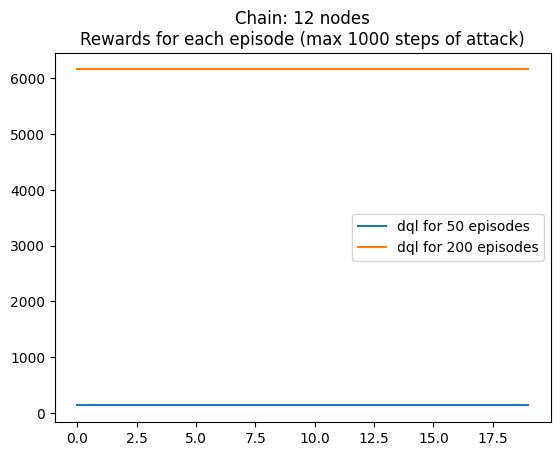

In [50]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

wrapped_env = AgentWrapper(gym_env,
                           ActionTrackingStateAugmentation(ep, gym_env.reset()))

learners = {'dql for 50 episodes': dql_run['learner'], 'dql for 200 episodes': dql_run_200['learner']}
 #copy.deepcopy(dql_exploit_run['learner'])
obs = []
h = []
n = 20 
iters_steps = 1000

render = True
for name, learner in learners.items():
    rewards = []
    for i_episode in range(n):
        observation = wrapped_env.reset()
        #learner.new_episode()
        obs.append(observation['action_mask']['local_vulnerability'])
        a = observation['action_mask']
        total_reward = 0

        for t in range(iters_steps):
            action_style, gym_action, action_metadata  = learner.exploit(wrapped_env, observation) ## gym action
            if render and i_episode == n-1: print(gym_action)
            if not gym_action:
                _, gym_action, action_metadata = learner.explore(wrapped_env)

            observation, reward, done, info = wrapped_env.step(gym_action)

            #print(info)
            #learner.on_step(wrapped_env, observation, reward, done, info, action_metadata)
            #learner.end_of_iteration(t, done)

            total_reward += reward

            h.append((gym_env.get_explored_network_node_properties_bitmap_as_numpy(observation), gym_action))
            #print(h[-1])
            if gym_action is None:
                break

            if render and i_episode == n-1 and reward>0:
                print('####### rewarded action: {action}')
                print(f'total_reward={total_reward} reward={reward}')
                wrapped_env.render()

            if done:  ####### If AttackerGoal is not NONE or all 0
                print("Episode finished after {} timesteps".format(t+1))
                break
        rewards += [total_reward]

        if render and i_episode == n-1: wrapped_env.render()

    wrapped_env.close()
    plt.plot(rewards, label=name)
print("simulation ended")

plt.title("Chain: 12 nodes\nRewards for each episode (max 1000 steps of attack)")
plt.legend()

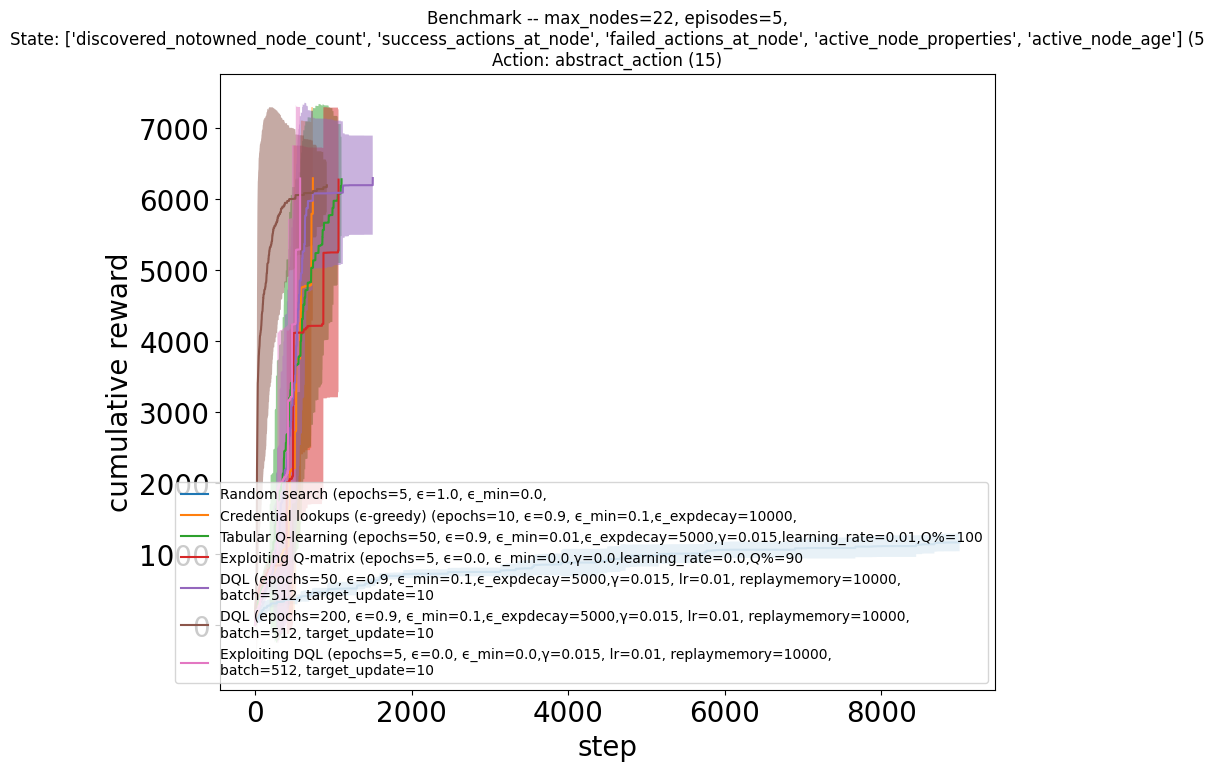

In [55]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

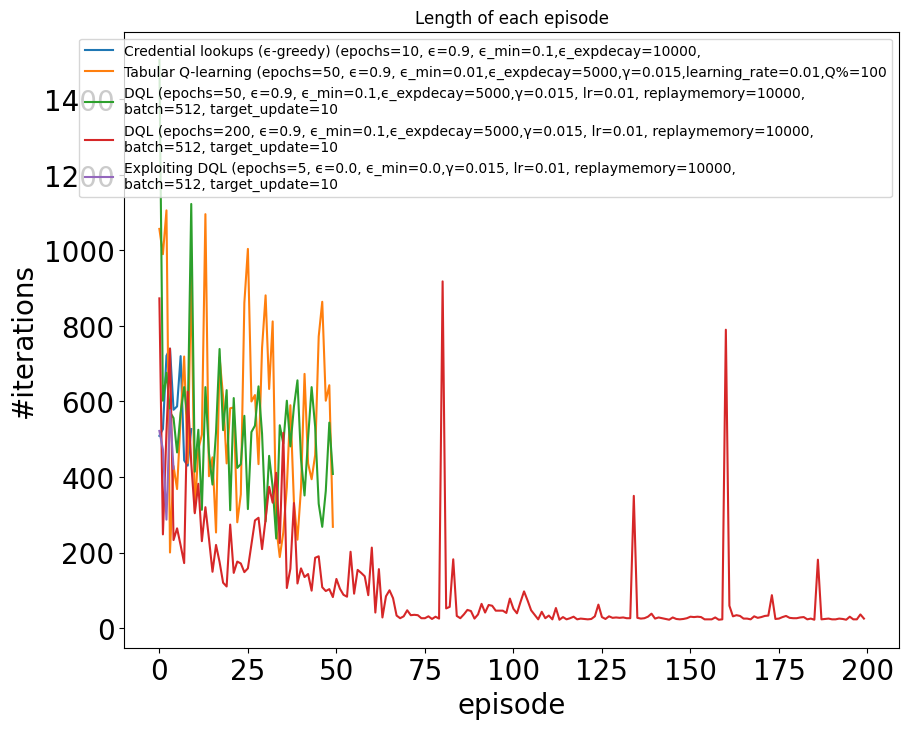

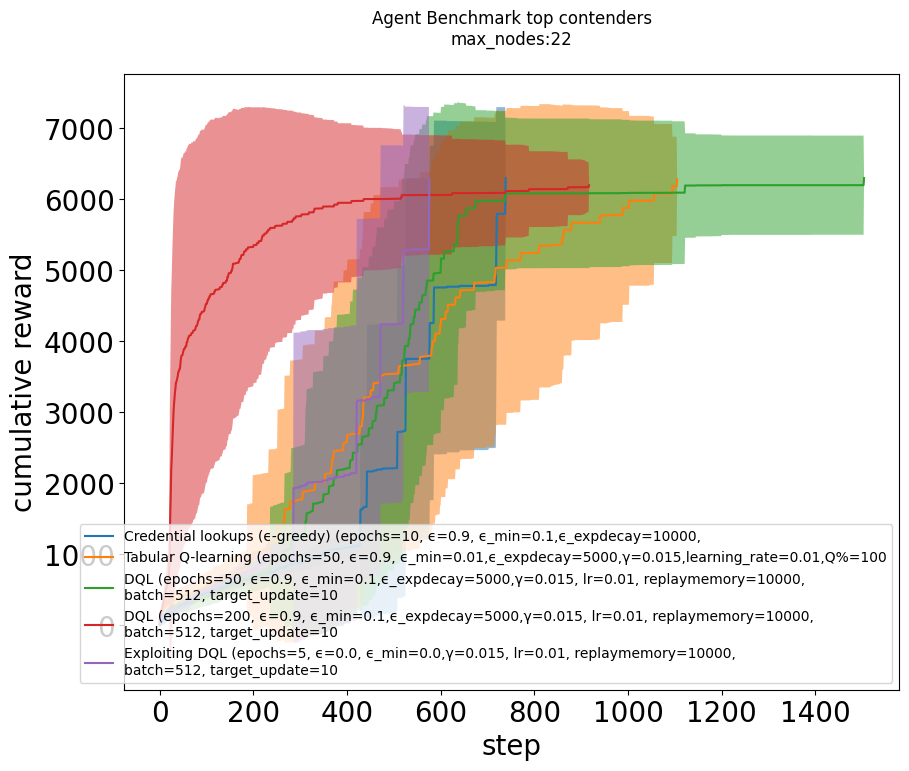

In [56]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

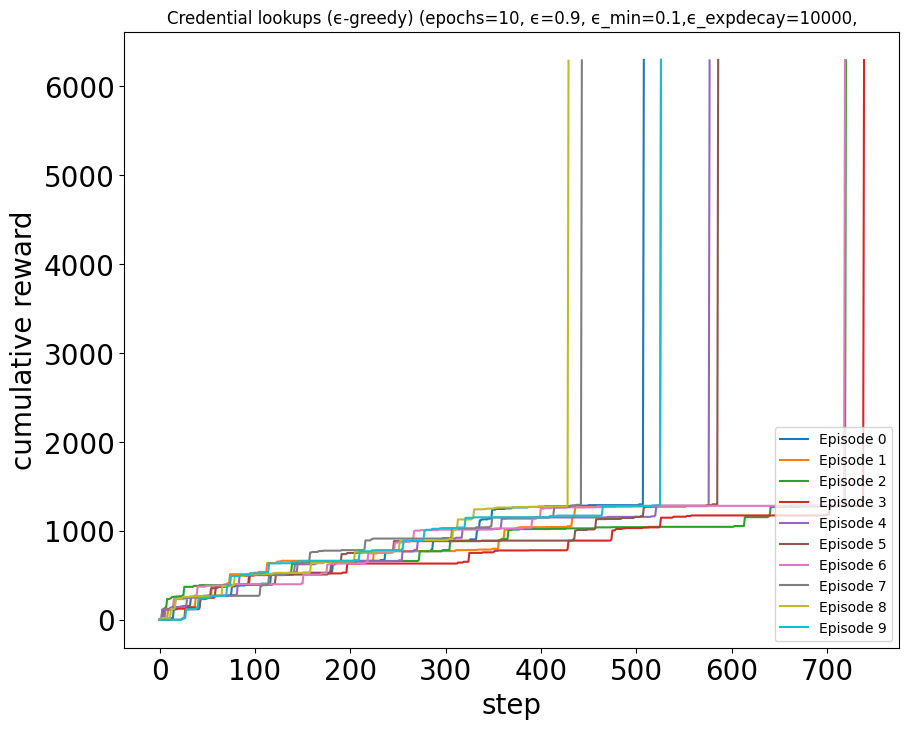

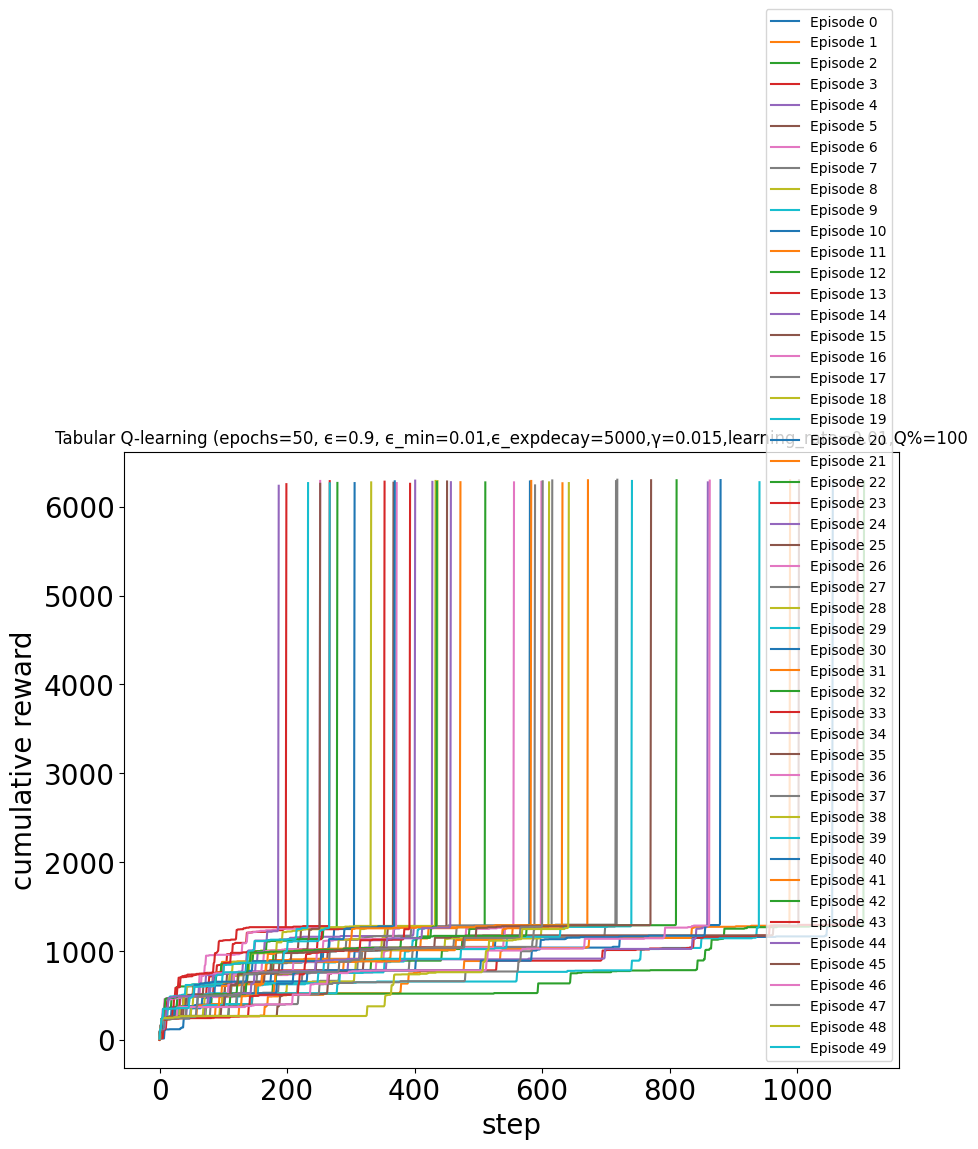

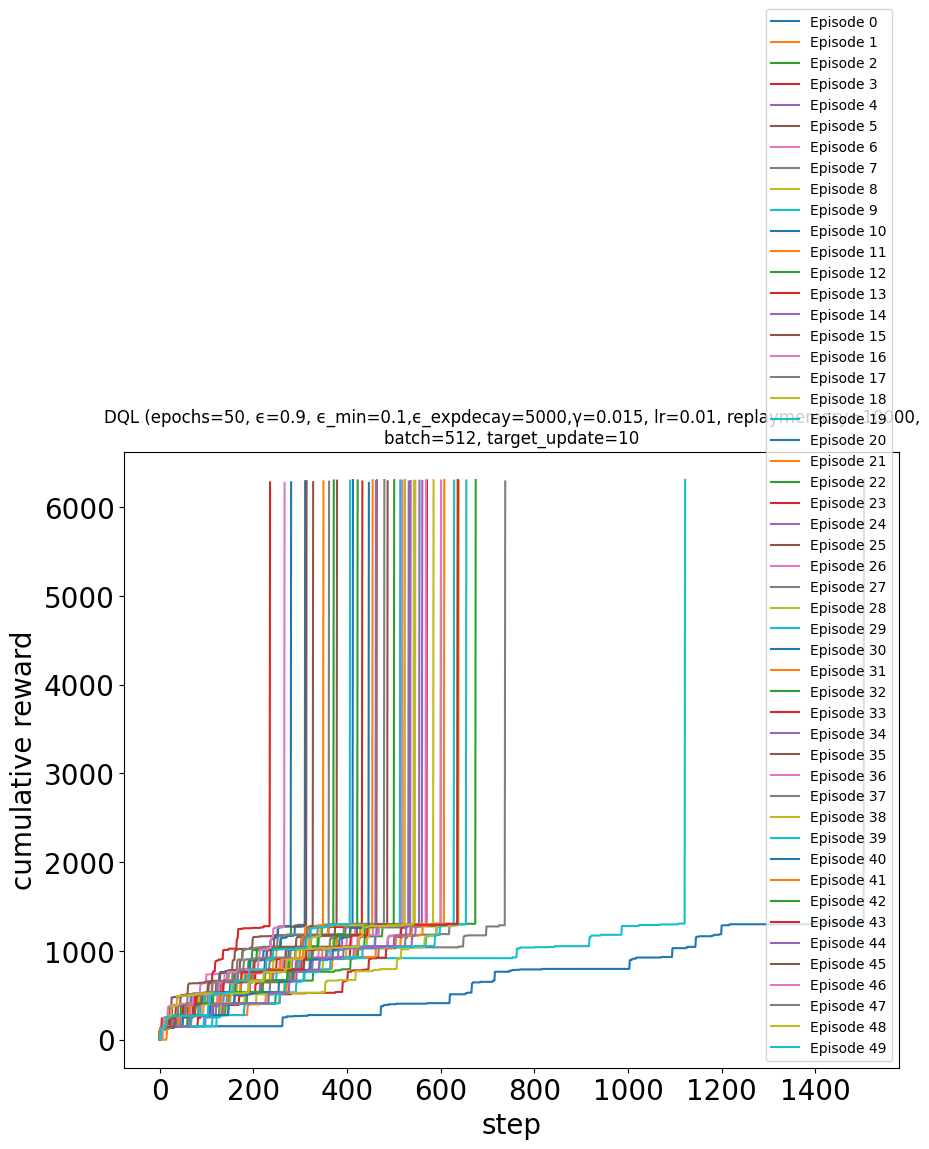

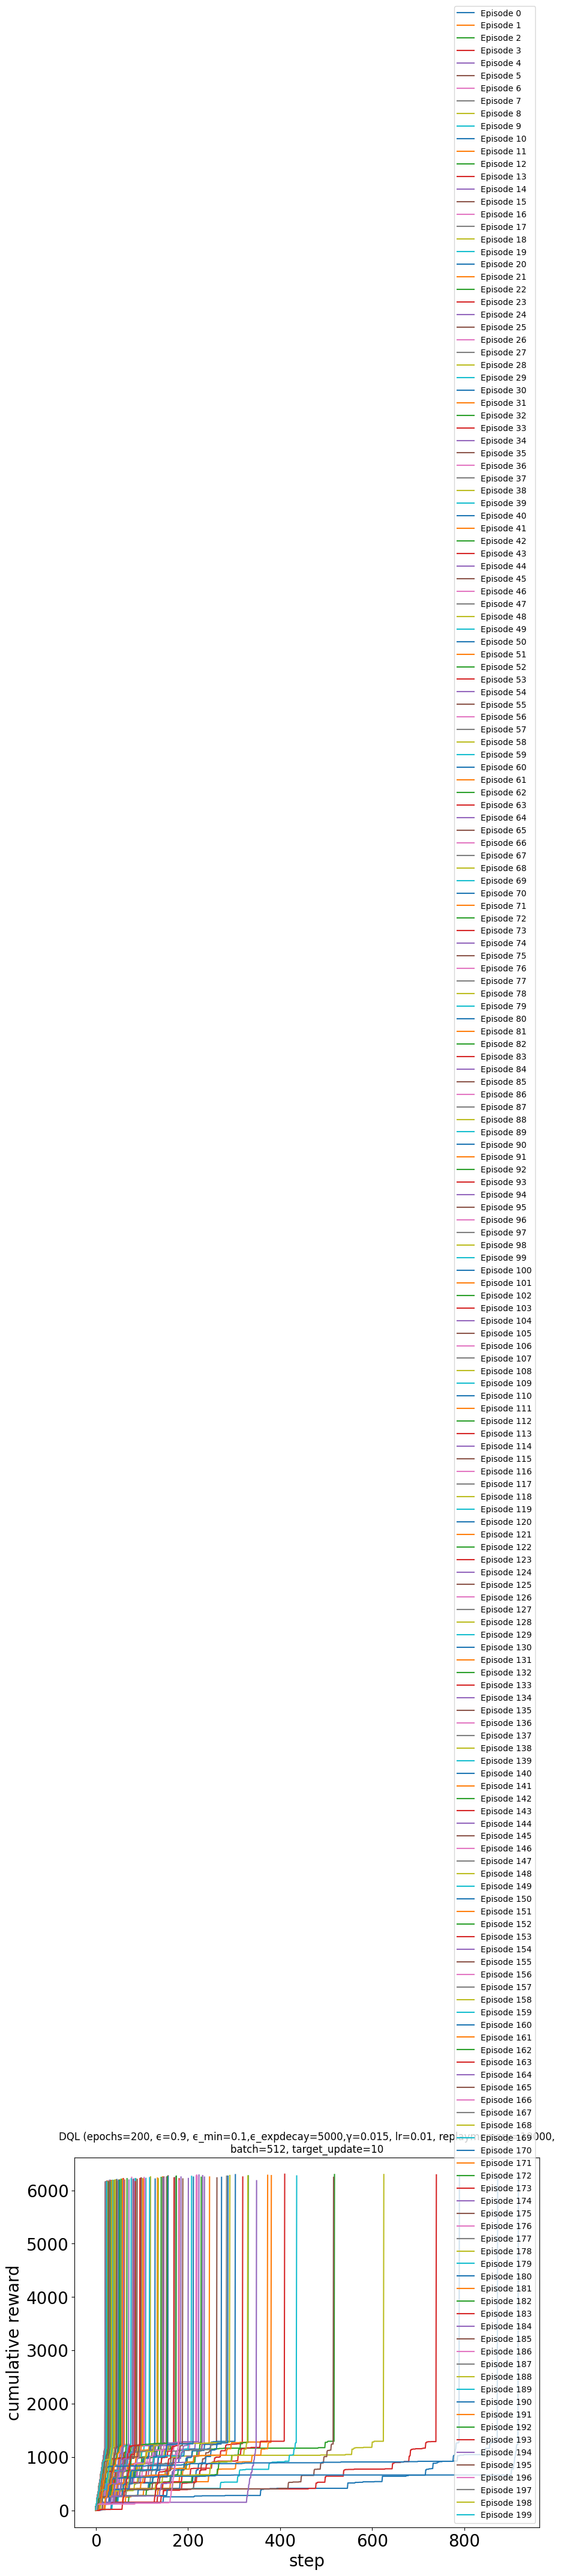

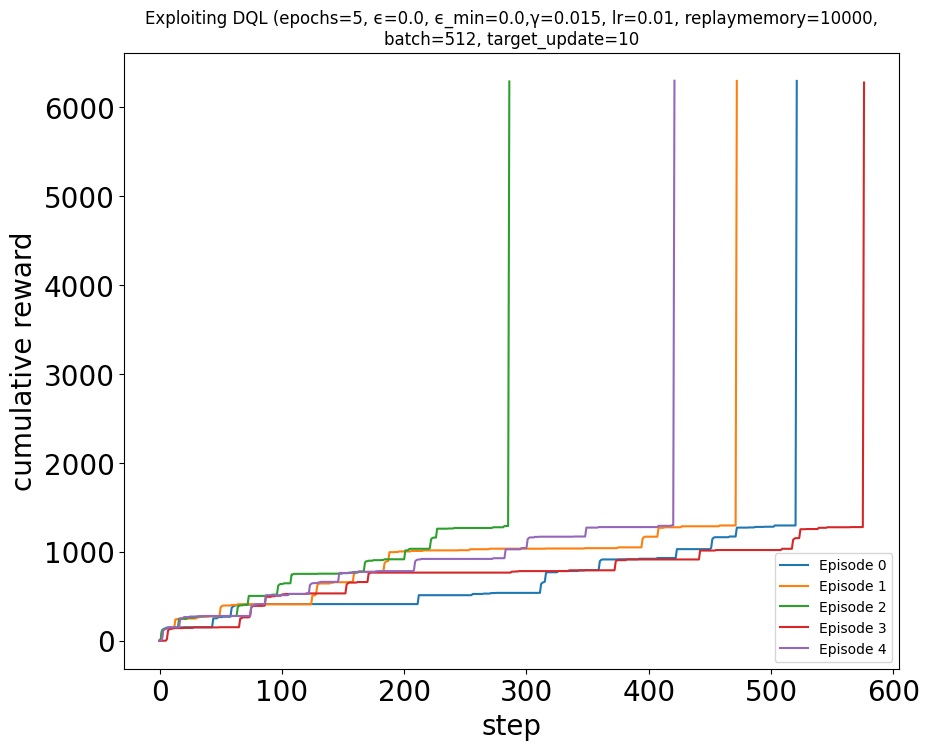

In [57]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)